In [1]:
!python -m pip install --upgrade pip
!pip install pandas openpyxl numpy



In [5]:
import pandas as pd
import numpy as np
import os
from collections import defaultdict

# Rutas de los archivos Excel de cada voluntario
rutas = [
    "C:/Users/fabia/Desktop/DPB4/Datos Reales/1. Primer voluntario (Alfonso)/Toma 5/resultados_percentiles.xlsx",
    "C:/Users/fabia/Desktop/DPB4/Datos Reales/2. Segundo voluntario (Wilfredo)/Toma 3/resultados_percentiles.xlsx",
    "C:/Users/fabia/Desktop/DPB4/Datos Reales/3. Tercer voluntario (Luis)/resultados_percentiles.xlsx",
    "C:/Users/fabia/Desktop/DPB4/Datos Reales/4. Cuarto voluntario (Antonio)/resultados_percentiles.xlsx",
    "C:/Users/fabia/Desktop/DPB4/Datos Reales/5. Quinto voluntario (Juan)/resultados_percentiles.xlsx",
    "C:/Users/fabia/Desktop/DPB4/Datos Reales/6. Sexto Voluntario (Edson)/resultados_percentiles.xlsx",
    "C:/Users/fabia/Desktop/DPB4/Datos Reales/7. Septimo Voluntario (Jack)/resultados_percentiles.xlsx",
    "C:/Users/fabia/Desktop/DPB4/Datos Reales/8. Octavo Voluntario (Luis S)/resultados_percentiles.xlsx",
    "C:/Users/fabia/Desktop/DPB4/Datos Reales/9. Novena Voluntaria (Lily)/resultados_percentiles.xlsx",
    "C:/Users/fabia/Desktop/DPB4/Datos Reales/10. Décimo Voluntario (Aldo)/resultados_percentiles.xlsx",
]

# Diccionario estándar de nombres base
nombre_hojas_dict = {
    "Flexo_extensi_n_hombro_derec": "FlexoExt_hombro",
    "Abducci_n_aducci_n_hombro_derec": "AbdAdd_hombro",
    "Flexo_extensi_n_codo_derec": "FlexoExt_codo",
    "Flexo_extensi_n_mu_eca_derec": "FlexoExt_Mnk",
    "Desviaci_n_radiocubital_mu_eca_derec": "DesvRadC_Mnk"
}

# Fases normales
fases = ["Propulsion", "Recuperacion"]

# Excepciones específicas por fase y base
excepciones_extra = {
    "FlexoExt_Mnk": {
        "Propulsion": "FlexoExt_Mnk_derecha_Propulsion",
        "Recuperacion": "FlexoExt_Mnk_derecha_Recuperaci"
    },
    "DesvRadC_Mnk": {
        "Propulsion": "DesvRadC_Mnk_derecha_Propulsion",
        "Recuperacion": "DesvRadC_Mnk_derecha_Recuperaci"
    }
}

# Inicializar resultados
resumen_final = []
hashes_hojas = defaultdict(list)

# Recorrer cada ángulo y fase
for hoja_base in nombre_hojas_dict.values():
    for fase in fases:
        hoja = f"{hoja_base}_{fase}"
        print(f"\n📄 Analizando hoja: {hoja}")

        ang_vals = []
        vel_vals = []
        acc_vals = []

        for archivo in rutas:
            if not os.path.exists(archivo):
                print(f"❌ Archivo no encontrado: {archivo}")
                continue

            try:
                xls = pd.ExcelFile(archivo)
                posibles_nombres = []

                if "Voluntaria (Lily)" in archivo or "Décimo Voluntario (Aldo)" in archivo:
                    if hoja_base in excepciones_extra:
                        posibles_nombres.append(excepciones_extra[hoja_base][fase])
                else:
                    posibles_nombres.append(hoja)

                hoja_valida = next((h for h in posibles_nombres if h in xls.sheet_names), None)
                if hoja_valida is None:
                    print(f"❌ Ninguna hoja válida encontrada en {archivo} para {hoja}")
                    continue

                df = pd.read_excel(xls, sheet_name=hoja_valida)

                if df.empty or df['Angulo'].isna().all():
                    print(f"⚠️ Hoja vacía o sin datos válidos en: {archivo} -> {hoja_valida}")
                    continue

                # Verificar duplicado por hash
                hash_val = hash(pd.util.hash_pandas_object(df, index=False).sum())
                if hash_val in hashes_hojas[hoja]:
                    print(f"⚠️ Hoja duplicada detectada en {archivo} -> {hoja_valida}")
                    continue
                hashes_hojas[hoja].append(hash_val)

                ang_vals.extend(df['Angulo'].dropna().tolist())
                vel_vals.extend(df['Velocidad'].dropna().tolist())
                acc_vals.extend(df['Aceleracion'].dropna().tolist())

            except Exception as e:
                print(f"❌ Error al leer {hoja} en {archivo}: {e}")
                continue

        resumen_final.append({
            'Ángulo-Fase': hoja,
            'Media (°) ± STD': f"{np.mean(ang_vals):.1f} ± {np.std(ang_vals):.1f}" if ang_vals else "NaN ± NaN",
            'Vel. (°/s) ± STD': f"{np.mean(vel_vals):.1f} ± {np.std(vel_vals):.1f}" if vel_vals else "NaN ± NaN",
            'Acel. (°/s²) ± STD': f"{np.mean(acc_vals):.1f} ± {np.std(acc_vals):.1f}" if acc_vals else "NaN ± NaN"
        })

# Mostrar resultado
df_resumen = pd.DataFrame(resumen_final)
print("\n✅ Resumen final generado:")
display(df_resumen)



📄 Analizando hoja: FlexoExt_hombro_Propulsion
❌ Ninguna hoja válida encontrada en C:/Users/fabia/Desktop/DPB4/Datos Reales/9. Novena Voluntaria (Lily)/resultados_percentiles.xlsx para FlexoExt_hombro_Propulsion
❌ Ninguna hoja válida encontrada en C:/Users/fabia/Desktop/DPB4/Datos Reales/10. Décimo Voluntario (Aldo)/resultados_percentiles.xlsx para FlexoExt_hombro_Propulsion

📄 Analizando hoja: FlexoExt_hombro_Recuperacion
❌ Ninguna hoja válida encontrada en C:/Users/fabia/Desktop/DPB4/Datos Reales/9. Novena Voluntaria (Lily)/resultados_percentiles.xlsx para FlexoExt_hombro_Recuperacion
❌ Ninguna hoja válida encontrada en C:/Users/fabia/Desktop/DPB4/Datos Reales/10. Décimo Voluntario (Aldo)/resultados_percentiles.xlsx para FlexoExt_hombro_Recuperacion

📄 Analizando hoja: AbdAdd_hombro_Propulsion
❌ Ninguna hoja válida encontrada en C:/Users/fabia/Desktop/DPB4/Datos Reales/9. Novena Voluntaria (Lily)/resultados_percentiles.xlsx para AbdAdd_hombro_Propulsion
❌ Ninguna hoja válida encontra

,Ángulo-Fase,Media (°) ± STD,Vel. (°/s) ± STD,Acel. (°/s²) ± STD
0,FlexoExt_hombro_Propulsion,14.7 ± 92.1,-218.0 ± 801.3,-311.0 ± 15191.4
1,FlexoExt_hombro_Recuperacion,14.9 ± 106.6,270.6 ± 1156.0,-586.9 ± 24528.0
2,AbdAdd_hombro_Propulsion,-5.4 ± 34.0,70.8 ± 398.8,375.6 ± 8135.7
3,AbdAdd_hombro_Recuperacion,8.5 ± 32.6,-92.2 ± 481.7,-460.3 ± 9860.8
4,FlexoExt_codo_Propulsion,-18.3 ± 66.9,41.1 ± 760.2,598.5 ± 14802.4
5,FlexoExt_codo_Recuperacion,15.4 ± 57.6,-96.8 ± 643.9,-554.1 ± 10879.3
6,FlexoExt_Mnk_Propulsion,-38.7 ± 79.8,196.2 ± 975.4,-2164.6 ± 19254.5
7,FlexoExt_Mnk_Recuperacion,-34.3 ± 21.3,-9.9 ± 464.2,1155.0 ± 11540.8
8,DesvRadC_Mnk_Propulsion,3.5 ± 55.6,190.1 ± 460.6,761.3 ± 7410.7
9,DesvRadC_Mnk_Recuperacion,-9.0 ± 18.7,-132.5 ± 410.2,420.4 ± 6942.1


SelectMultiple(description='Voluntarios', index=(2, 9), options=(('Voluntario 1', 0), ('Voluntario 2', 1), ('V…

Button(button_style='success', description='Comparar voluntarios', style=ButtonStyle())

Angulo              \
                                                    mean         std   
Angulo-Fase                     Voluntario                             
AbdAdd_hombro_Propulsion        Voluntario 10   1.222188   37.916155   
                                Voluntario 3  -13.734949   55.814281   
AbdAdd_hombro_Recuperacion      Voluntario 10   1.684466   24.701754   
                                Voluntario 3   26.235007   47.802374   
DesvRadC_Mnk_derecha_Propulsion Voluntario 10   3.543713   55.846186   
                                Voluntario 3  -33.014827   77.428691   
DesvRadC_Mnk_derecha_Recuperaci Voluntario 10  -9.010034   18.840206   
                                Voluntario 3   19.754529   95.319803   
FlexoExt_Mnk_derecha_Propulsion Voluntario 10 -38.711058   80.227908   
                                Voluntario 3  -17.580415  104.889622   
FlexoExt_Mnk_derecha_Recuperaci Voluntario 10 -34.285228   21.400740   
                                Voluntario 3   -5.655706   97.538502   
FlexoExt_codo_Propulsion        Voluntario 10   0.329556   45.661709   
                                Voluntario 3   -6.862794   64.972502   
FlexoExt_codo_Recuperacion      Voluntario 10  18.952070   45.700655   
                                Voluntario 3    2.987098   68.460359   
FlexoExt_hombro_Propulsion      Voluntario 10  54.661134  103.659611   
                                Voluntario 3    5.209847   67.331566   
FlexoExt_hombro_Recuperacion    Voluntario 10 -61.220667   73.137797   
                                Voluntario 3   22.838294   63.282053   

                                                                       \
                                                      min         max   
Angulo-Fase                     Voluntario                              
AbdAdd_hombro_Propulsion        Voluntario 10  -49.406114   73.379728   
                                Voluntario 3   -83.035897   82.038474   
AbdAdd_hombro_Recuperacion      Voluntario 10  -46.807925   60.092521   
                                Voluntario 3   -54.444389   94.356819   
DesvRadC_Mnk_derecha_Propulsion Voluntario 10  -74.577659   61.343177   
                                Voluntario 3  -121.720149   89.380935   
DesvRadC_Mnk_derecha_Recuperaci Voluntario 10  -43.671859   29.502055   
                                Voluntario 3  -115.692185  119.871065   
FlexoExt_Mnk_derecha_Propulsion Voluntario 10 -121.804034  115.326812   
                                Voluntario 3  -125.920908  121.585704   
FlexoExt_Mnk_derecha_Recuperaci Voluntario 10  -70.524074    3.285889   
                                Voluntario 3  -121.953619  115.092339   
FlexoExt_codo_Propulsion        Voluntario 10  -64.939491   75.945753   
                                Voluntario 3   -91.376812   95.979989   
FlexoExt_codo_Recuperacion      Voluntario 10  -79.365247   73.606449   
                                Voluntario 3   -99.667349   97.400041   
FlexoExt_hombro_Propulsion      Voluntario 10 -128.701775  150.145115   
                                Voluntario 3   -84.809166   91.253770   
FlexoExt_hombro_Recuperacion    Voluntario 10 -161.834857   79.879815   
                                Voluntario 3   -81.482606   87.154501   

                                                            Velocidad  \
                                                   median        mean   
Angulo-Fase                     Voluntario                              
AbdAdd_hombro_Propulsion        Voluntario 10   -5.083565 -220.403362   
                                Voluntario 3   -26.532644  181.125693   
AbdAdd_hombro_Recuperacion      Voluntario 10    2.900632  219.172390   
                                Voluntario 3    35.758573 -131.391143   
DesvRadC_Mnk_derecha_Propulsion Voluntario 10   22.128113  190.117126   
                                Voluntario 3   -73.487907 -265.917179   
DesvRadC_Mnk_derecha_Recuperaci Voluntario 10   -2.46277

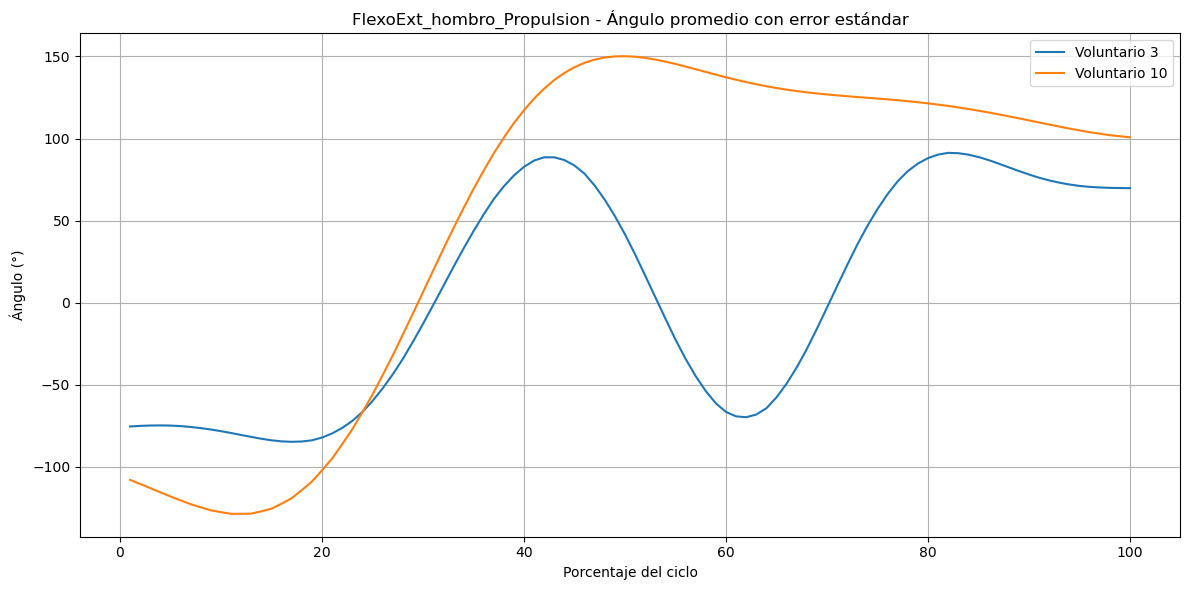

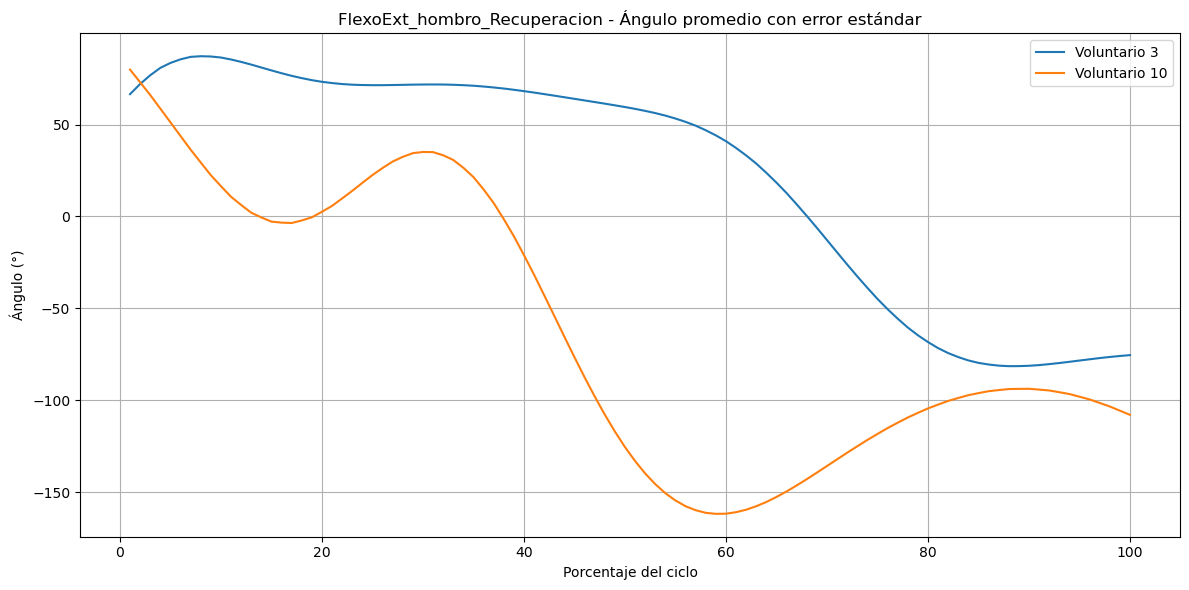

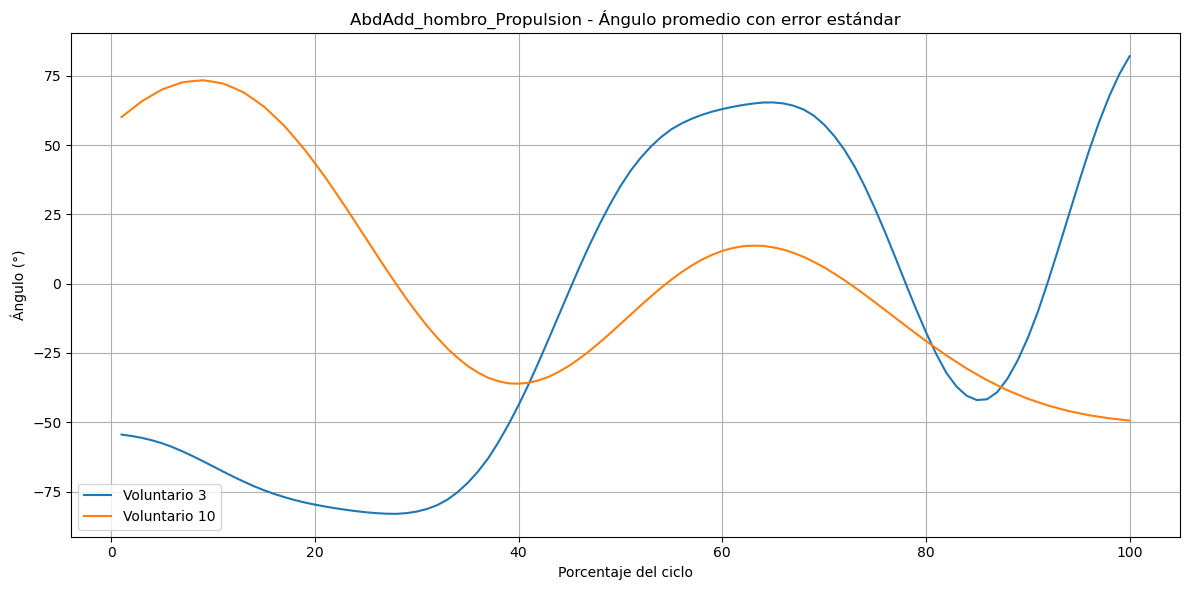

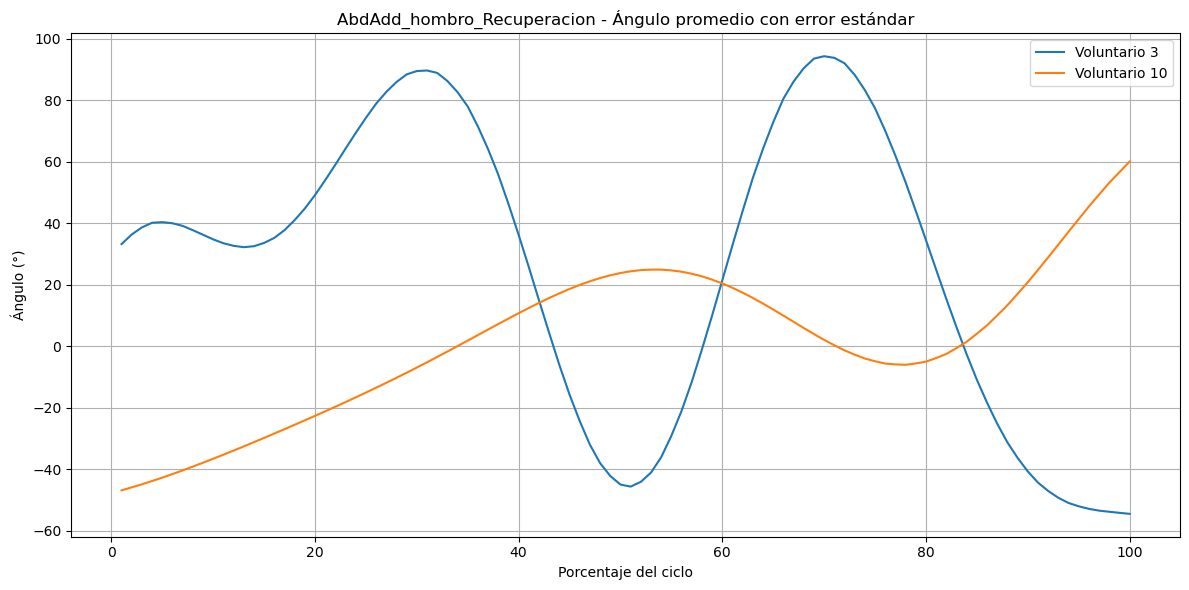

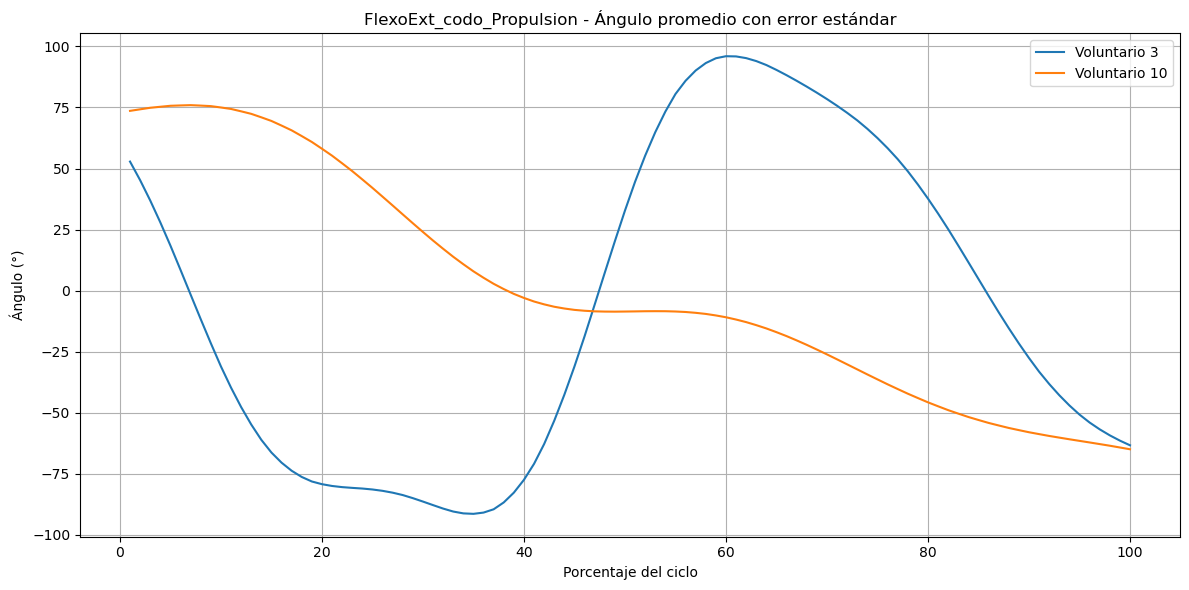

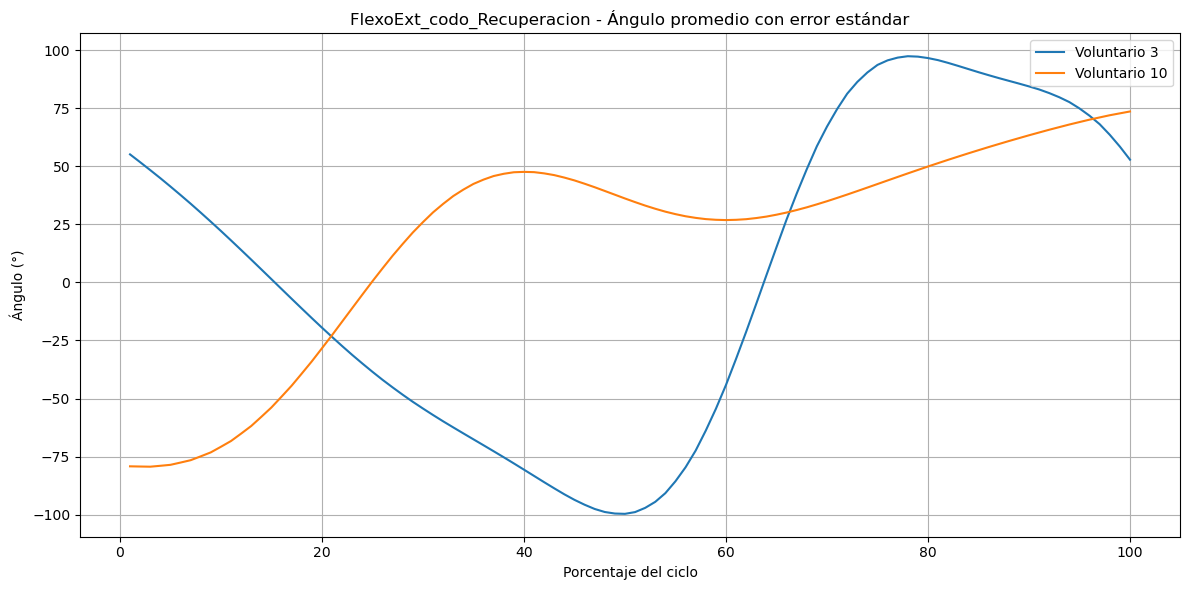

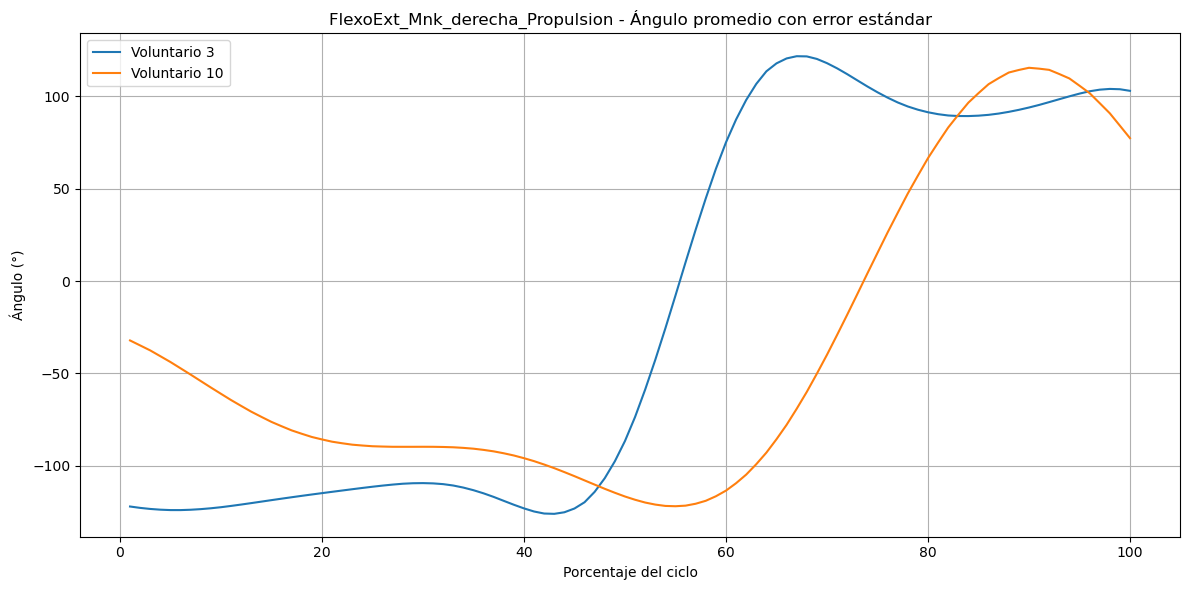

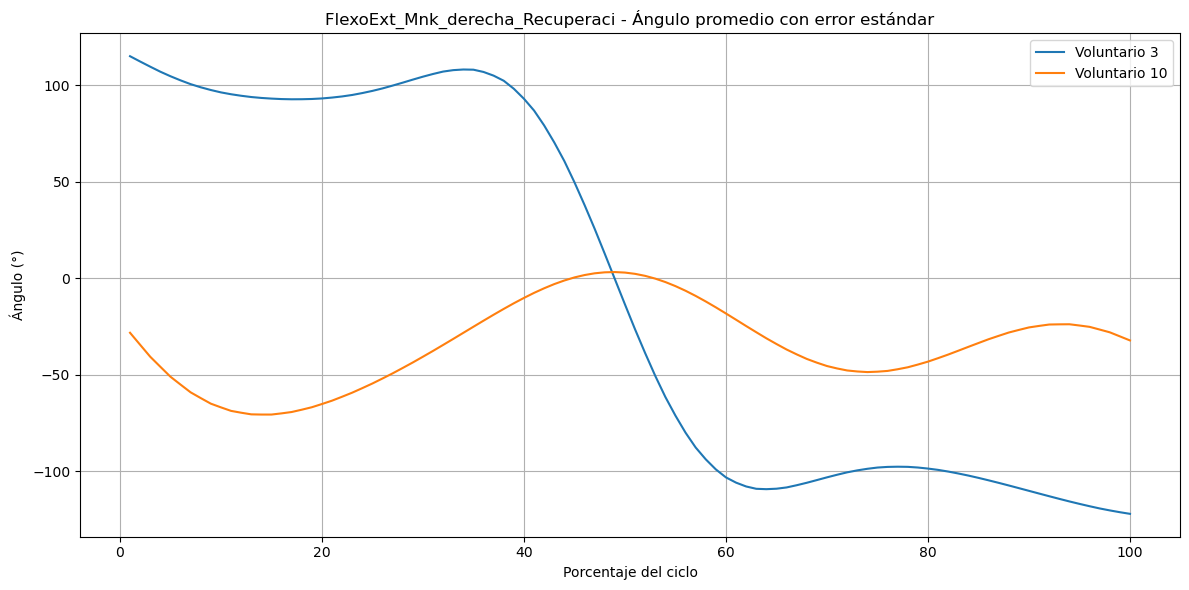

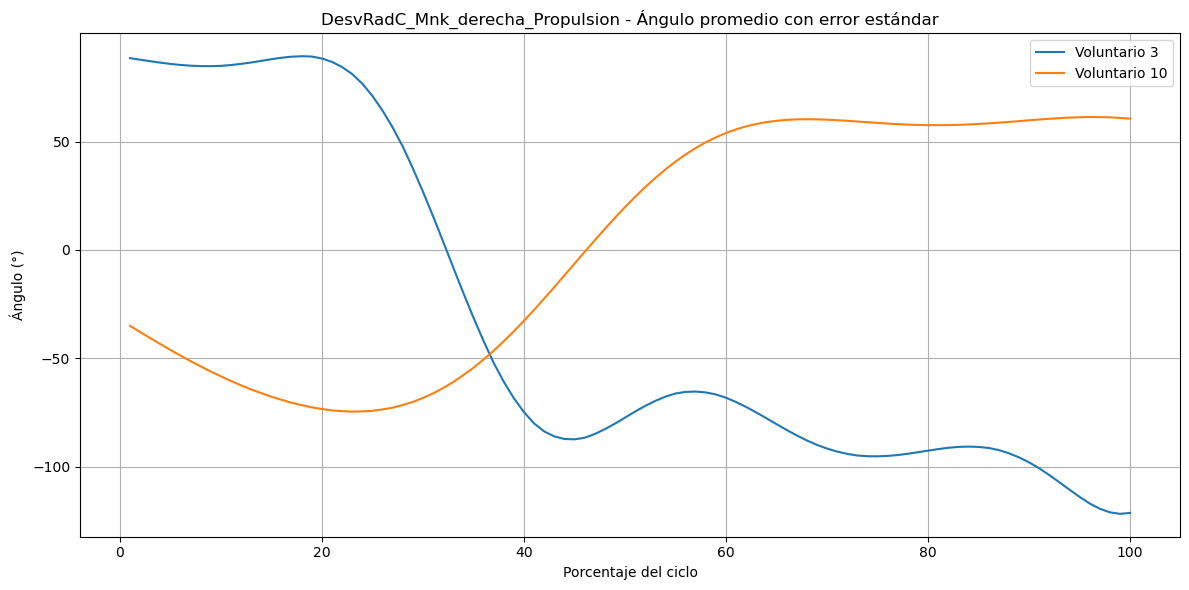

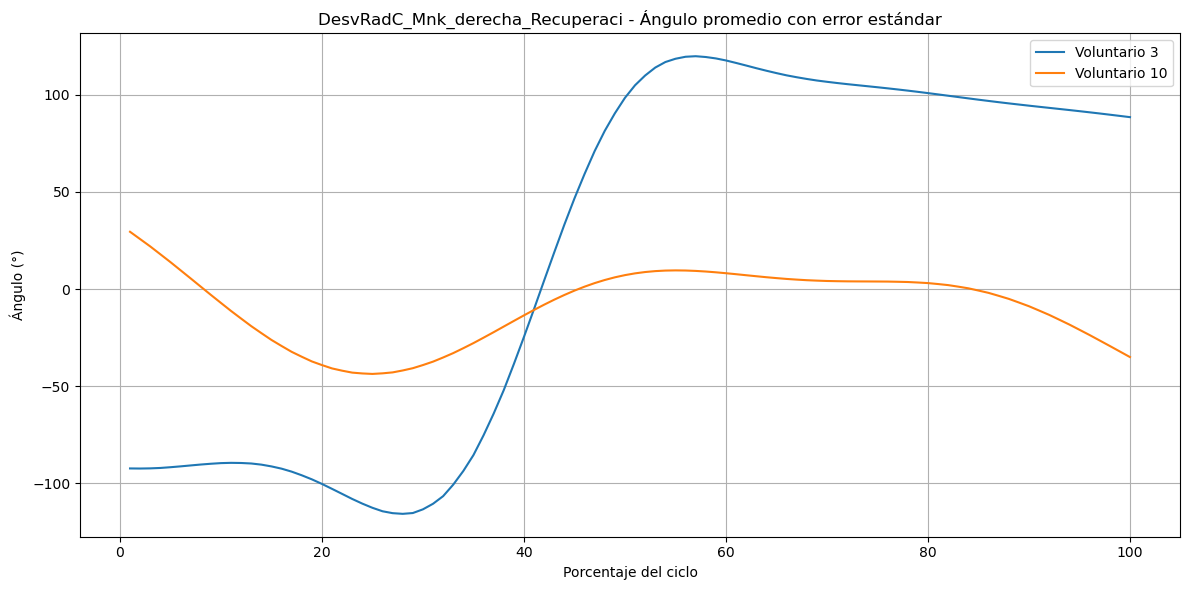

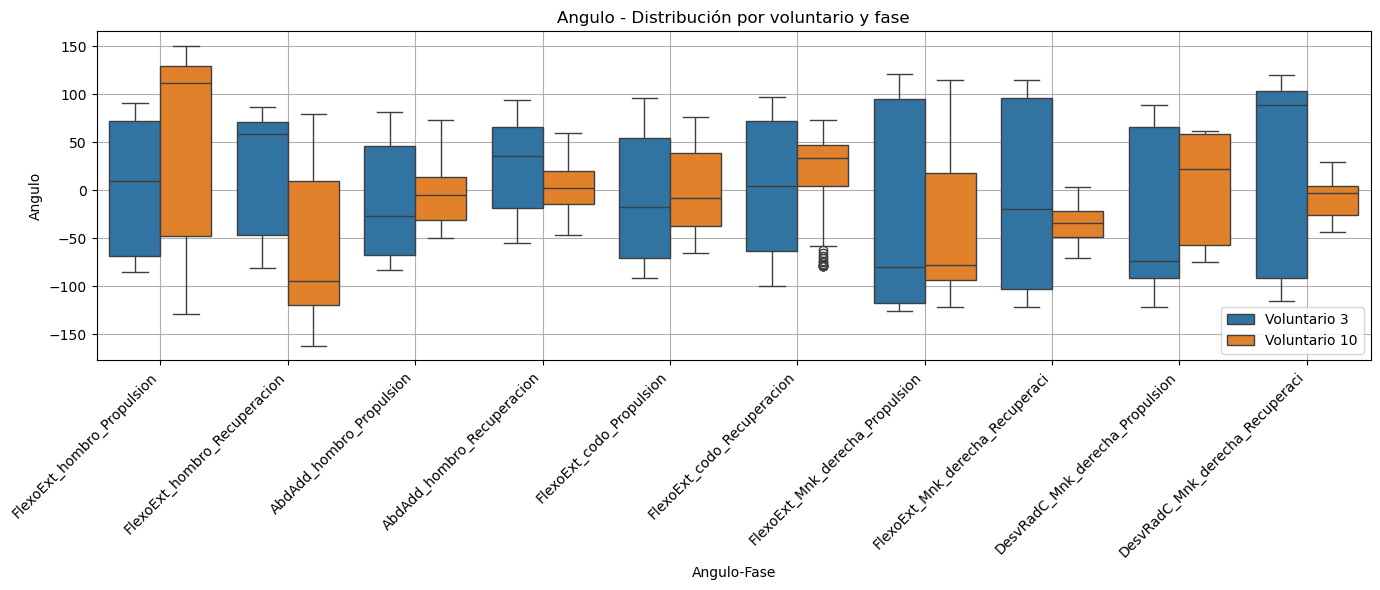

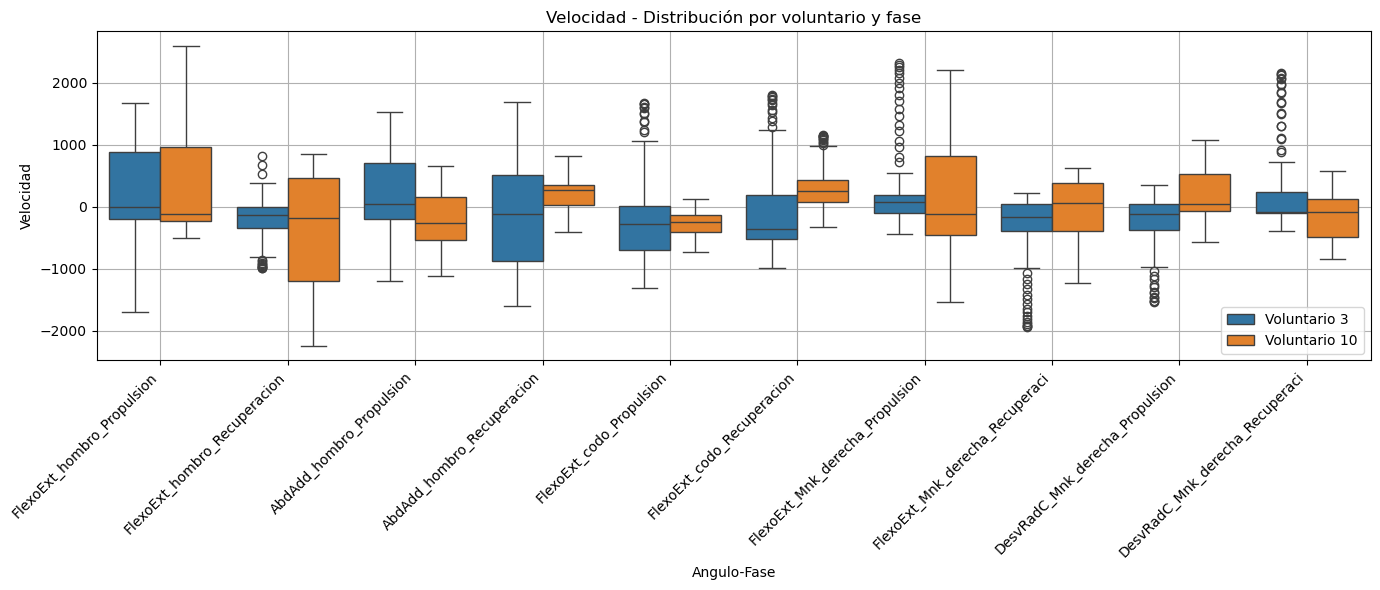

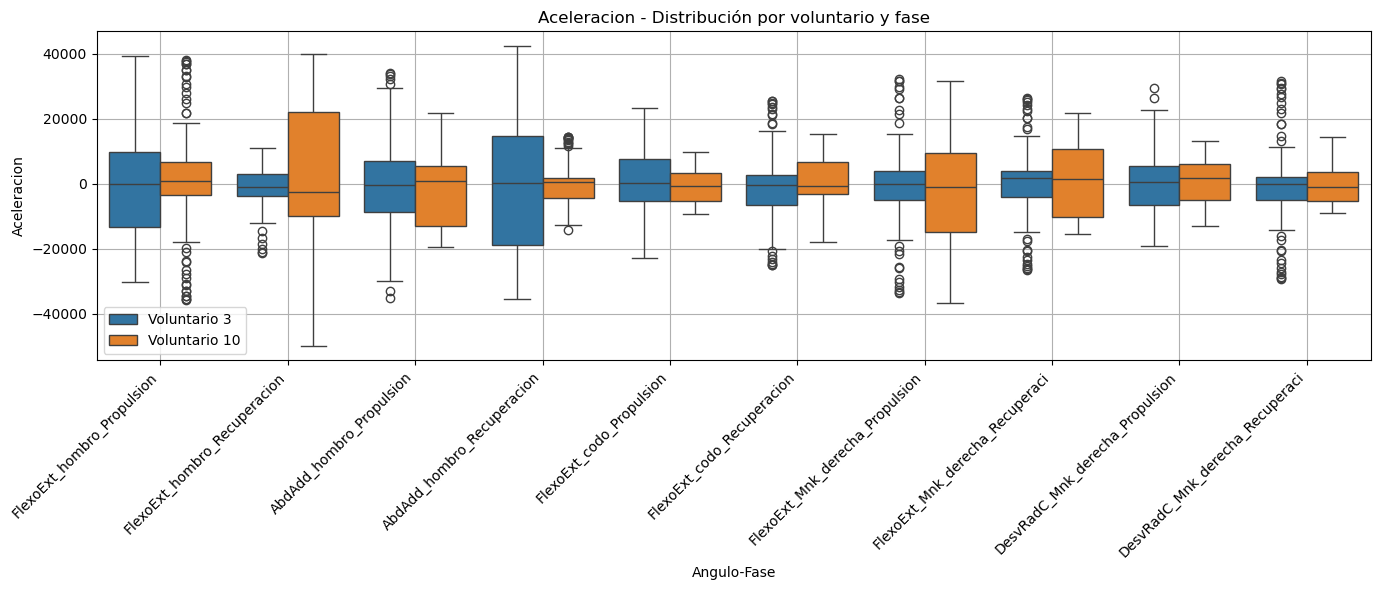

,Angulo_Mean,Angulo_STD,Angulo_Rango,Velocidad_Mean,Velocidad_STD,Velocidad_Pico,Aceleracion_Mean,Aceleracion_STD,Aceleracion_Pico
Voluntario,,,,,,,,,
Voluntario 10,-6.283386,64.708174,311.979972,31.200332,677.817863,2590.938572,189.099723,13482.864049,40089.786863
Voluntario 3,0.017608,78.245195,247.506612,-20.365456,733.698532,2313.485531,-71.702435,13607.526956,42351.005128


In [9]:
# ✅ Instalación (si es necesario)
!pip install pandas numpy matplotlib seaborn scipy ipywidgets openpyxl --quiet

# ✅ Librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display, clear_output
import os

# ✅ Directorio base
base_dir = "C:/Users/fabia/Desktop/DPB4/Datos Reales/"

# ✅ Archivos Excel de los 10 voluntarios
archivos = [
    "1. Primer voluntario (Alfonso)/Toma 5/resultados_percentiles.xlsx",
    "2. Segundo voluntario (Wilfredo)/Toma 3/resultados_percentiles.xlsx",
    "3. Tercer voluntario (Luis)/resultados_percentiles.xlsx",
    "4. Cuarto voluntario (Antonio)/resultados_percentiles.xlsx",
    "5. Quinto voluntario (Juan)/resultados_percentiles.xlsx",
    "6. Sexto Voluntario (Edson)/resultados_percentiles.xlsx",
    "7. Septimo Voluntario (Jack)/resultados_percentiles.xlsx",
    "8. Octavo Voluntario (Luis S)/resultados_percentiles.xlsx",
    "9. Novena Voluntaria (Lily)/resultados_percentiles.xlsx",
    "10. Décimo Voluntario (Aldo)/resultados_percentiles.xlsx",
]
archivos = [os.path.join(base_dir, ruta) for ruta in archivos]
nombres_voluntarios = [f"Voluntario {i+1}" for i in range(10)]

# ✅ Nombres estándar de hojas (ángulo-fase)
hojas = [
    "FlexoExt_hombro_Propulsion", "FlexoExt_hombro_Recuperacion",
    "AbdAdd_hombro_Propulsion", "AbdAdd_hombro_Recuperacion",
    "FlexoExt_codo_Propulsion", "FlexoExt_codo_Recuperacion",
    "FlexoExt_Mnk_Propulsion", "FlexoExt_Mnk_Recuperacion",
    "DesvRadC_Mnk_Propulsion", "DesvRadC_Mnk_Recuperacion",
    "FlexoExt_Mnk_derecha_Propulsion", "FlexoExt_Mnk_derecha_Recuperaci",
    "DesvRadC_Mnk_derecha_Propulsion", "DesvRadC_Mnk_derecha_Recuperaci"
]

# ✅ Widget para seleccionar voluntarios
vol_selector = widgets.SelectMultiple(
    options=list(zip(nombres_voluntarios, range(len(nombres_voluntarios)))),  # (etiqueta, valor)
    description='Voluntarios',
    rows=10
)

# ✅ Botón de ejecución
boton = widgets.Button(description="Comparar voluntarios", button_style='success')

# ✅ Función principal
def on_boton_clicked(b):
    clear_output(wait=True)
    display(vol_selector, boton)

    indices = list(vol_selector.value)
    if not indices:
        print("⚠️ Selecciona al menos un voluntario.")
        return

    datos = []
    for idx in indices:
        archivo = archivos[idx]
        try:
            xls = pd.ExcelFile(archivo)
            for hoja in hojas:
                if hoja in xls.sheet_names:
                    df = pd.read_excel(xls, sheet_name=hoja)
                    df['Voluntario'] = nombres_voluntarios[idx]
                    df['Angulo-Fase'] = hoja
                    datos.append(df)
        except Exception as e:
            print(f"❌ Error leyendo {archivo}: {e}")

    if not datos:
        print("⚠️ No se pudieron cargar datos de los voluntarios seleccionados.")
        return

    df_total = pd.concat(datos, ignore_index=True)

    # ✅ Estadística descriptiva
    print("📊 Estadística descriptiva:")
    resumen = df_total.groupby(['Angulo-Fase', 'Voluntario']).agg({
        'Angulo': ['mean', 'std', 'min', 'max', 'median'],
        'Velocidad': ['mean', 'std', 'min', 'max', 'median'],
        'Aceleracion': ['mean', 'std', 'min', 'max', 'median']
    })
    display(resumen)

    # ✅ Gráficas de líneas con error estándar
    for angulo in df_total['Angulo-Fase'].unique():
        plt.figure(figsize=(12, 6))
        df_plot = df_total[df_total['Angulo-Fase'] == angulo]
        sns.lineplot(data=df_plot, x='Porcentaje', y='Angulo', hue='Voluntario', errorbar='se', palette="tab10")
        plt.title(f"{angulo} - Ángulo promedio con error estándar")
        plt.xlabel("Porcentaje del ciclo")
        plt.ylabel("Ángulo (°)")
        plt.legend(loc='best')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    # ✅ Boxplots por variable
    for variable in ['Angulo', 'Velocidad', 'Aceleracion']:
        plt.figure(figsize=(14,6))
        sns.boxplot(data=df_total, x='Angulo-Fase', y=variable, hue='Voluntario')
        plt.title(f"{variable} - Distribución por voluntario y fase")
        plt.xticks(rotation=45, ha='right')
        plt.grid(True)
        plt.legend(loc='best')
        plt.tight_layout()
        plt.show()

    # ✅ Métricas globales por voluntario
    print("📈 Métricas globales:")
    metricas = df_total.groupby('Voluntario').agg({
        'Angulo': ['mean', 'std', lambda x: x.max()-x.min()],
        'Velocidad': ['mean', 'std', 'max'],
        'Aceleracion': ['mean', 'std', 'max']
    })
    metricas.columns = ['Angulo_Mean', 'Angulo_STD', 'Angulo_Rango',
                        'Velocidad_Mean', 'Velocidad_STD', 'Velocidad_Pico',
                        'Aceleracion_Mean', 'Aceleracion_STD', 'Aceleracion_Pico']
    display(metricas)

# ✅ Conexión del botón con la función
boton.on_click(on_boton_clicked)

# ✅ Mostrar widgets interactivos
display(vol_selector, boton)


SelectMultiple(description='Voluntarios', index=(2, 5, 9), options=(('Voluntario 1', 0), ('Voluntario 2', 1), …

Button(button_style='success', description='Comparar voluntarios', style=ButtonStyle())

Angulo              \
                                                    mean         std   
Angulo-Fase                     Voluntario                             
AbdAdd_hombro_Propulsion        Voluntario 10   1.222188   37.916155   
                                Voluntario 3  -13.734949   55.814281   
                                Voluntario 6   -9.826924   36.095292   
AbdAdd_hombro_Recuperacion      Voluntario 10   1.684466   24.701754   
                                Voluntario 3   26.235007   47.802374   
                                Voluntario 6    4.492643   28.995365   
DesvRadC_Mnk_derecha_Propulsion Voluntario 10   3.543713   55.846186   
                                Voluntario 3  -33.014827   77.428691   
                                Voluntario 6   30.182874  100.559090   
DesvRadC_Mnk_derecha_Recuperaci Voluntario 10  -9.010034   18.840206   
                                Voluntario 3   19.754529   95.319803   
                                Voluntario 6   26.296983   70.323425   
FlexoExt_Mnk_derecha_Propulsion Voluntario 10 -38.711058   80.227908   
                                Voluntario 3  -17.580415  104.889622   
                                Voluntario 6   -8.947273   74.288292   
FlexoExt_Mnk_derecha_Recuperaci Voluntario 10 -34.285228   21.400740   
                                Voluntario 3   -5.655706   97.538502   
                                Voluntario 6   -8.532890   97.445117   
FlexoExt_codo_Propulsion        Voluntario 10   0.329556   45.661709   
                                Voluntario 3   -6.862794   64.972502   
                                Voluntario 6  -14.425594   70.394815   
FlexoExt_codo_Recuperacion      Voluntario 10  18.952070   45.700655   
                                Voluntario 3    2.987098   68.460359   
                                Voluntario 6   20.354900   33.660191   
FlexoExt_hombro_Propulsion      Voluntario 10  54.661134  103.659611   
                                Voluntario 3    5.209847   67.331566   
                                Voluntario 6   22.550506  100.742152   
FlexoExt_hombro_Recuperacion    Voluntario 10 -61.220667   73.137797   
                                Voluntario 3   22.838294   63.282053   
                                Voluntario 6  -10.569141  130.587214   

                                                                       \
                                                      min         max   
Angulo-Fase                     Voluntario                              
AbdAdd_hombro_Propulsion        Voluntario 10  -49.406114   73.379728   
                                Voluntario 3   -83.035897   82.038474   
                                Voluntario 6   -50.014657   49.189123   
AbdAdd_hombro_Recuperacion      Voluntario 10  -46.807925   60.092521   
                                Voluntario 3   -54.444389   94.356819   
                                Voluntario 6   -32.443141   40.400911   
DesvRadC_Mnk_derecha_Propulsion Voluntario 10  -74.577659   61.343177   
                                Voluntario 3  -121.720149   89.380935   
                                Voluntario 6  -121.514788  127.525859   
DesvRadC_Mnk_derecha_Recuperaci Voluntario 10  -43.671859   29.502055   
                                Voluntario 3  -115.692185  119.871065   
                                Voluntario 6   -83.503053  101.422338   
FlexoExt_Mnk_derecha_Propulsion Voluntario 10 -121.804034  115.326812   
                                Voluntario 3  -125.920908  121.585704   
                                Voluntario 6   -96.725111   89.679790   
FlexoExt_Mnk_derecha_Recuperaci Voluntario 10  -70.524074    3.285889   
                                Voluntario 3  -121.953619  115.092339   
                                Voluntario 6  -124.489786  123.509280   
FlexoExt_codo_Propulsion        Voluntario 10  -64.939491   75.945753   
                                Voluntario 3   -91.376812   95.9799

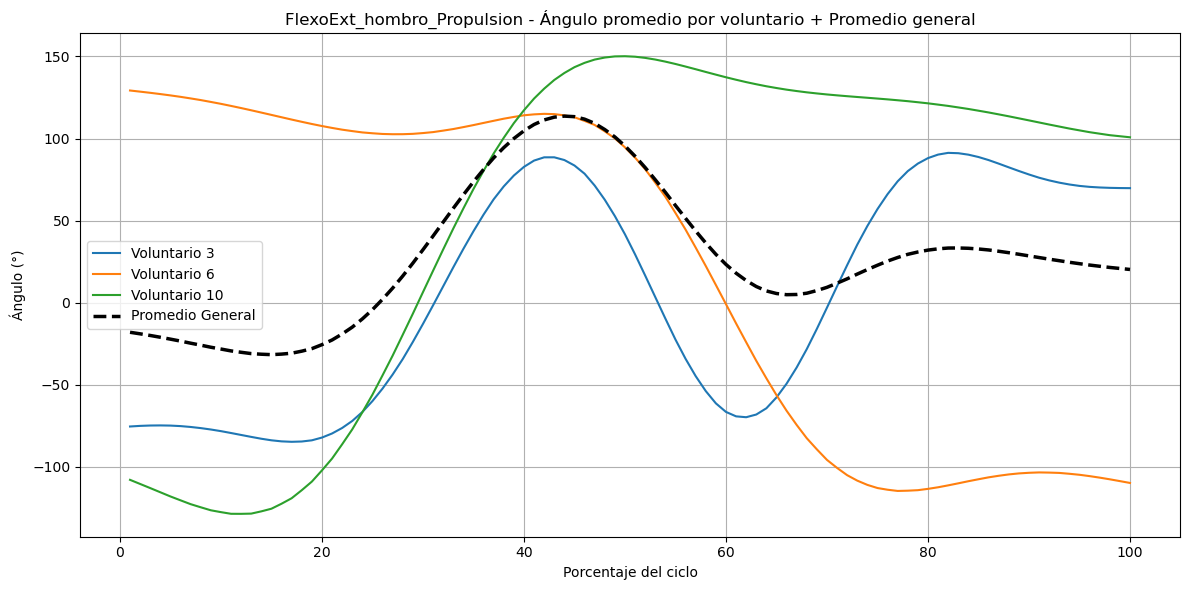

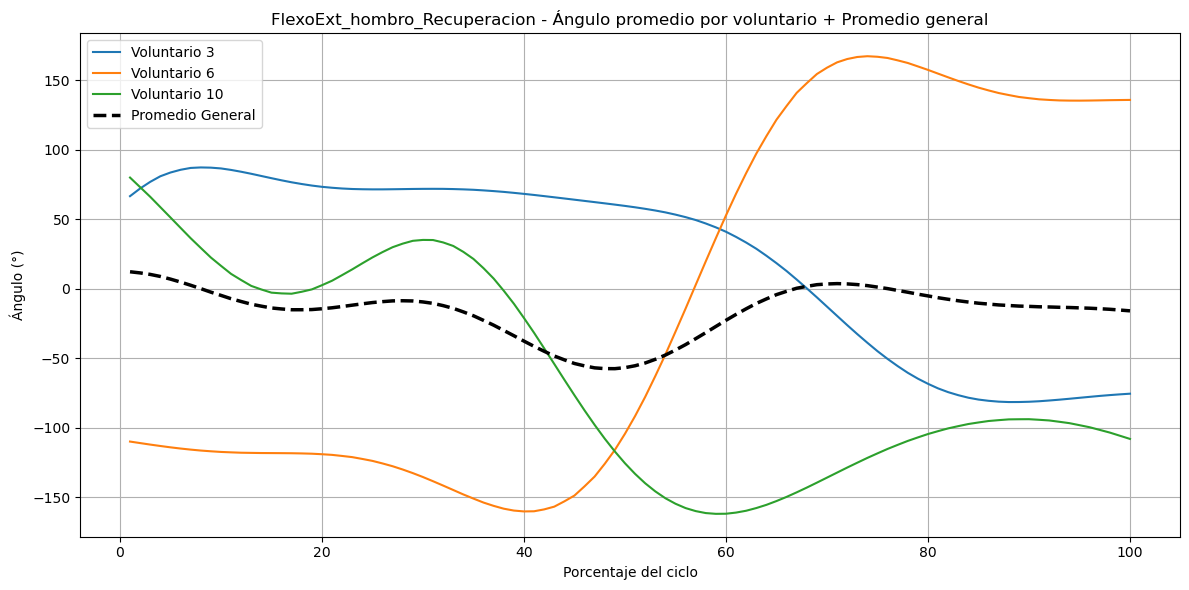

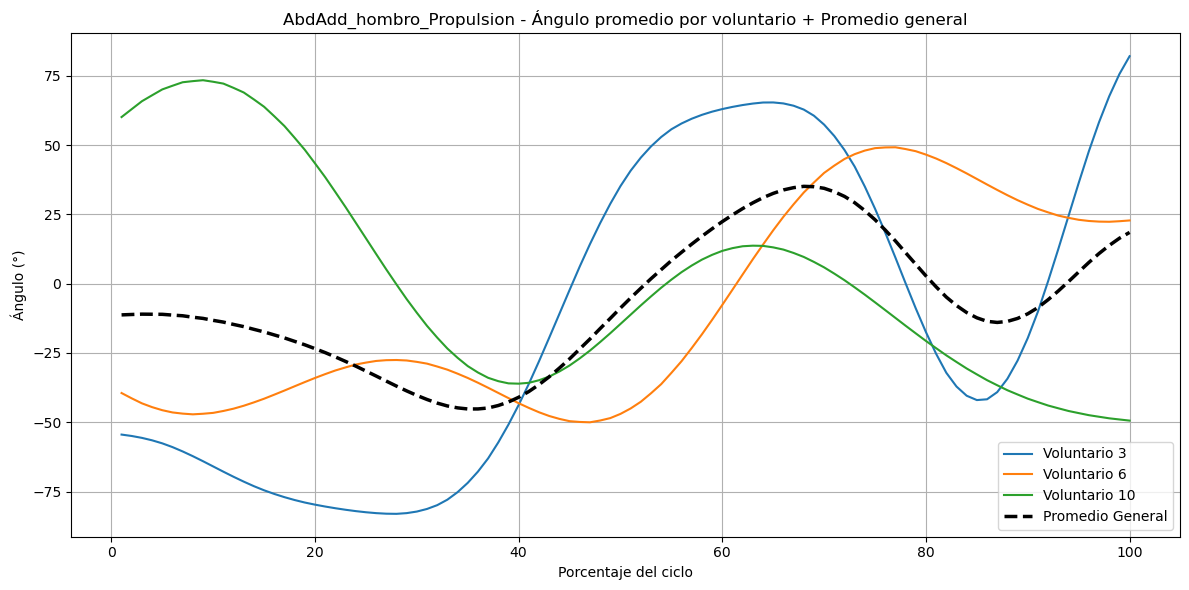

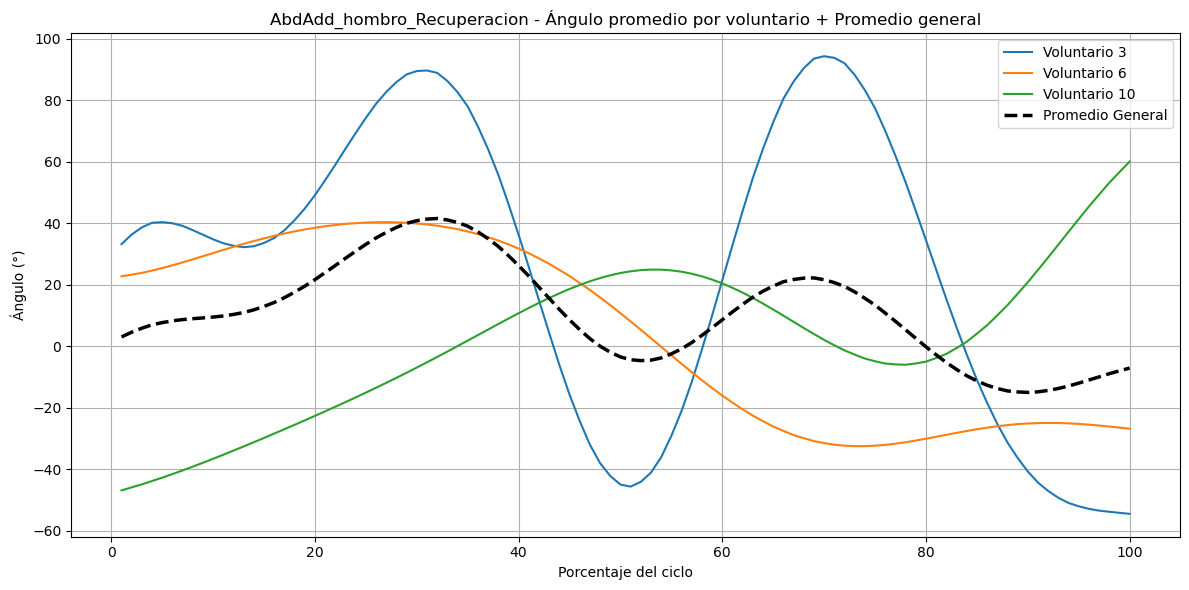

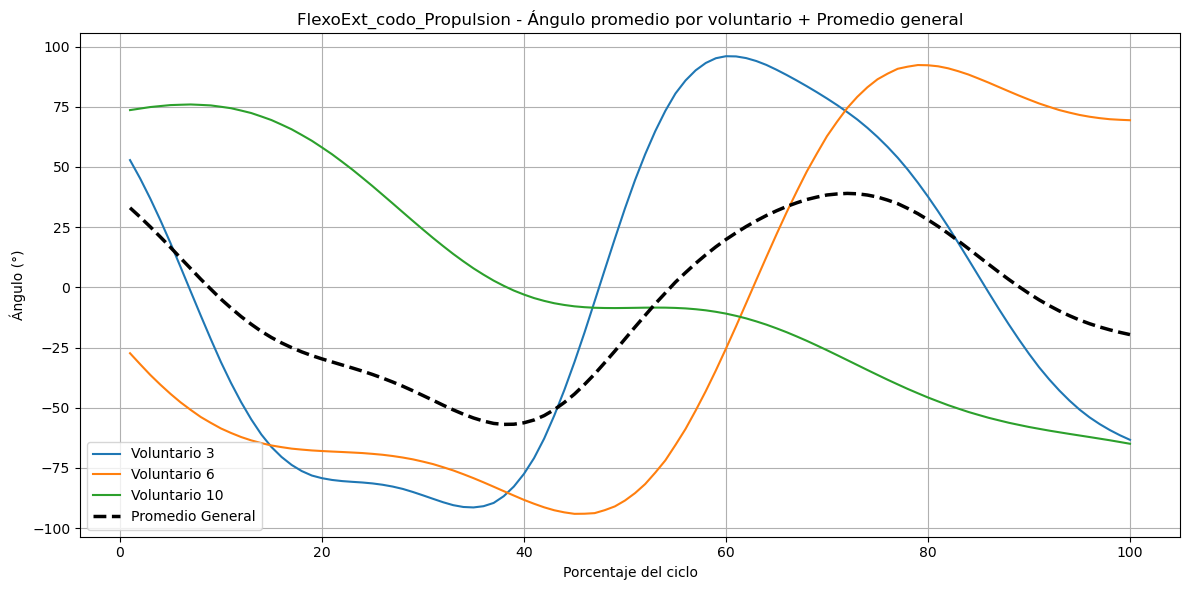

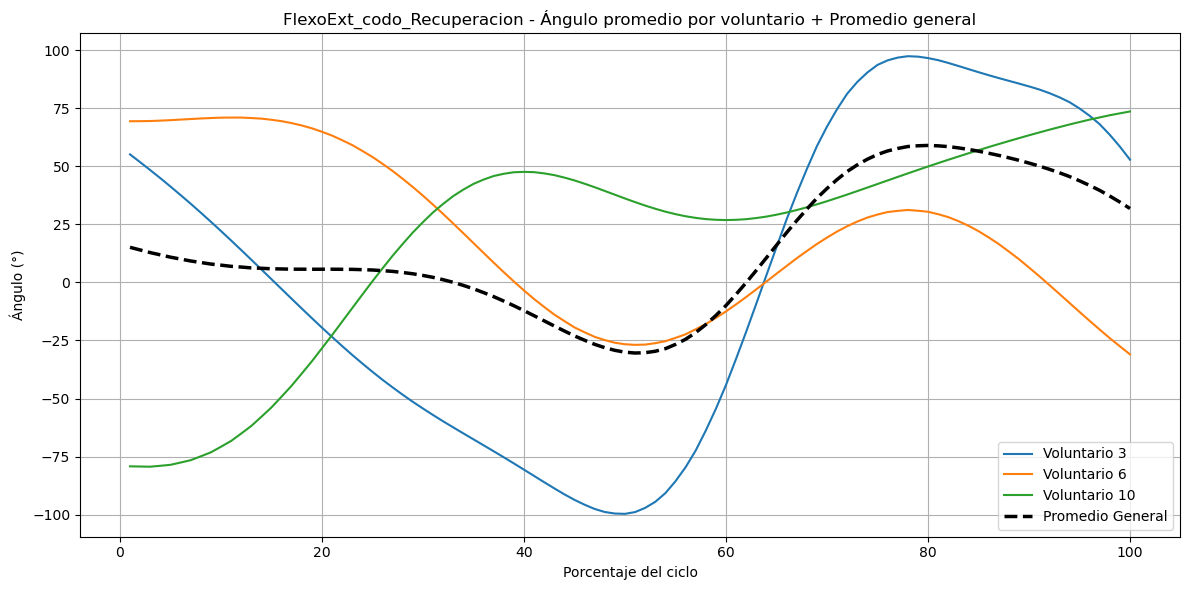

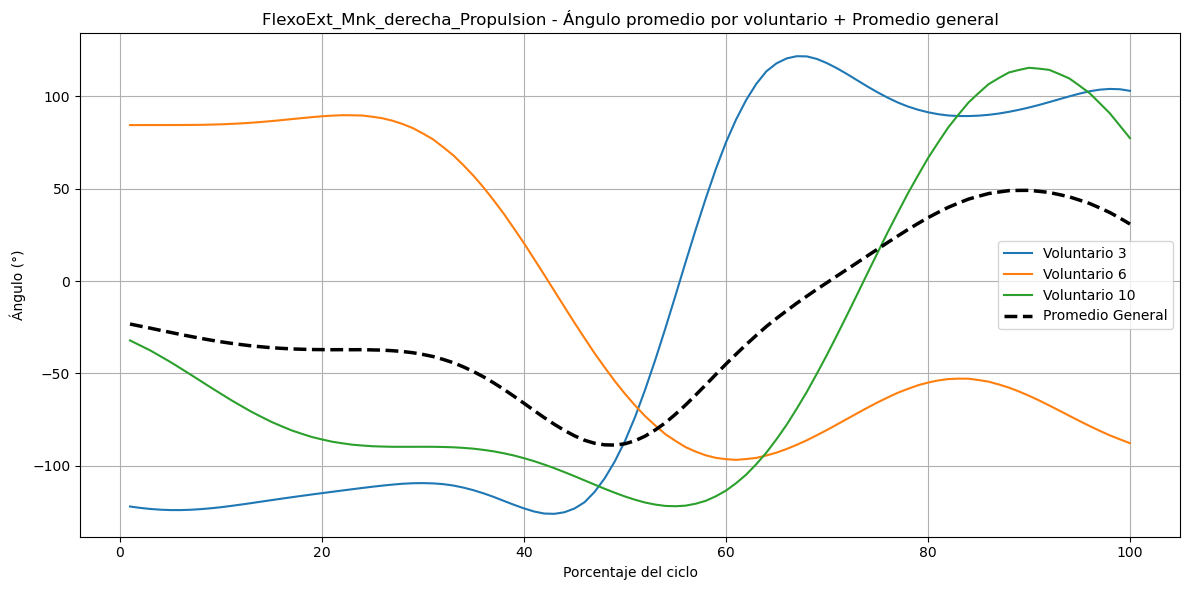

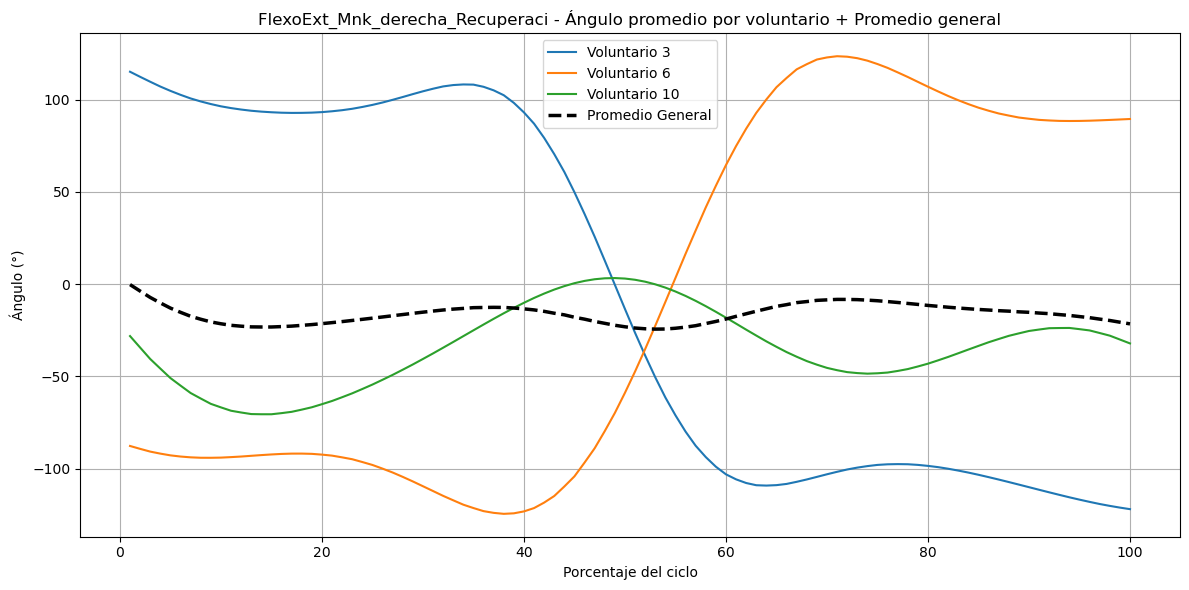

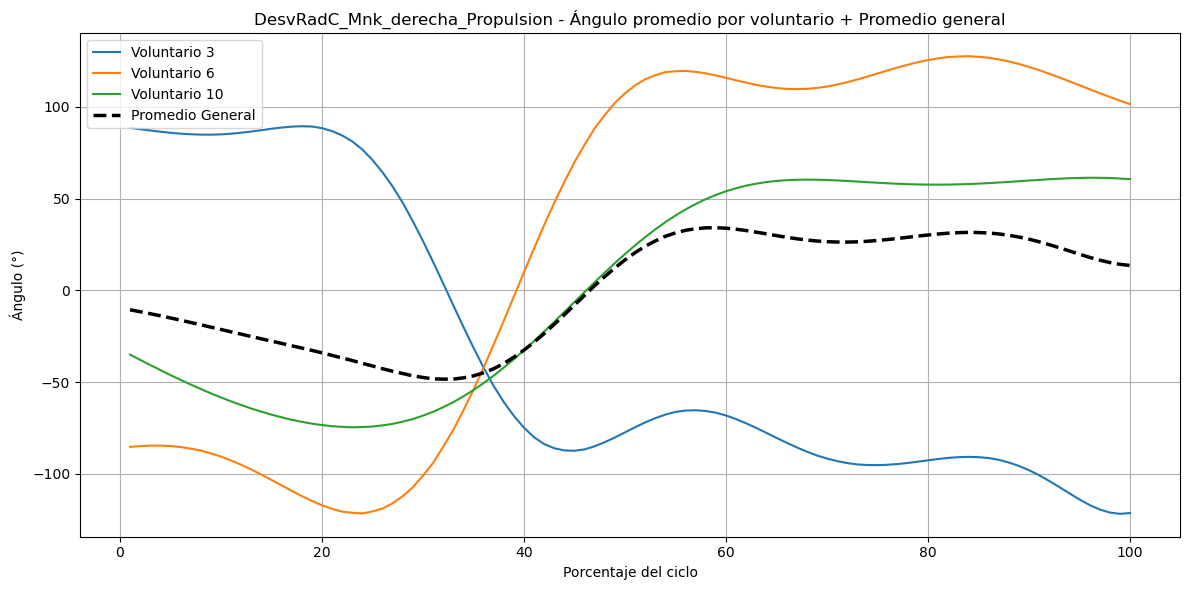

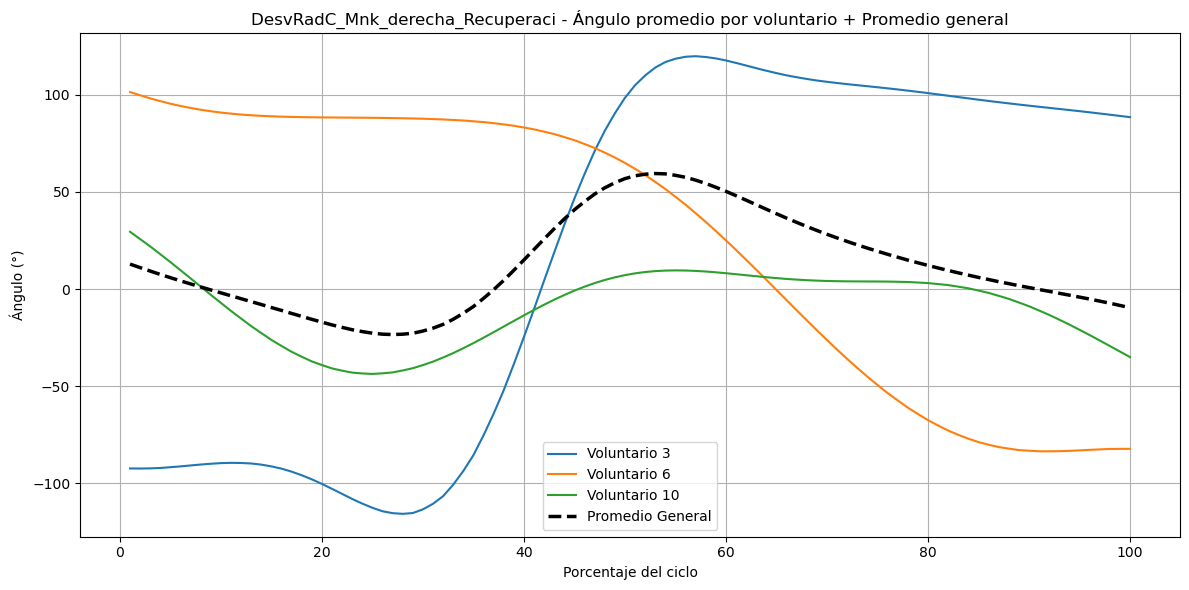

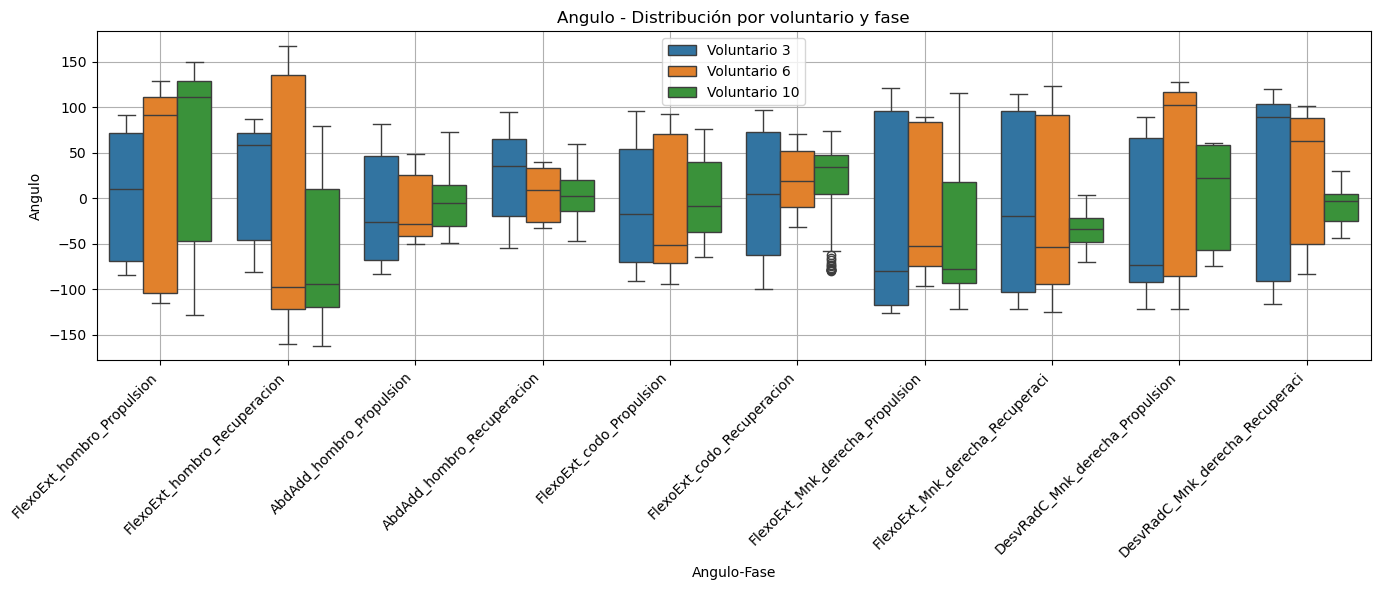

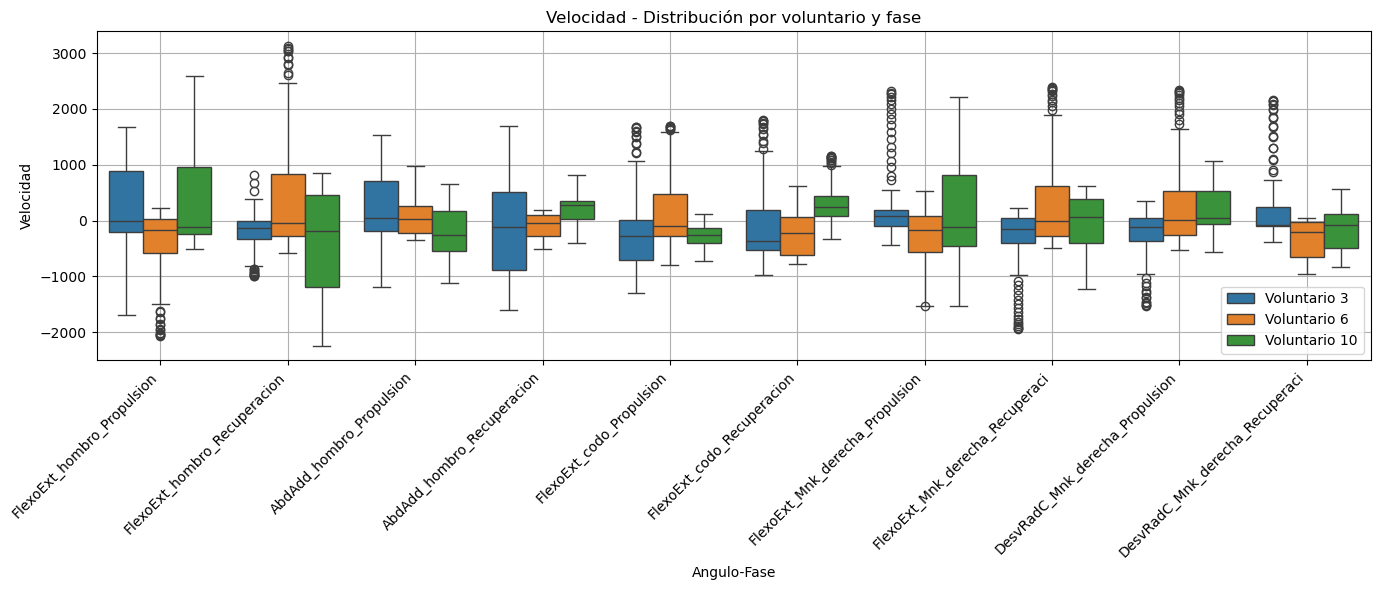

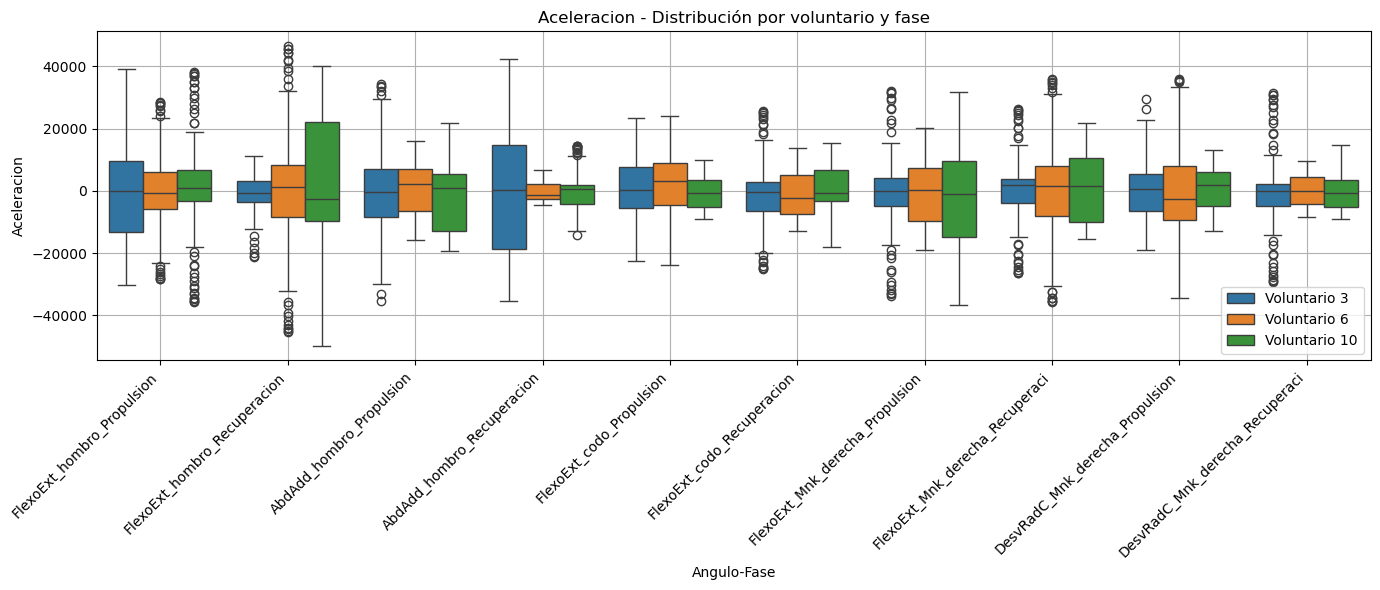

,Angulo_Mean,Angulo_STD,Angulo_Rango,Velocidad_Mean,Velocidad_STD,Velocidad_Pico,Aceleracion_Mean,Aceleracion_STD,Aceleracion_Pico
Voluntario,,,,,,,,,
Voluntario 10,-6.283386,64.708174,311.979972,31.200332,677.817863,2590.938572,189.099723,13482.864049,40089.786863
Voluntario 3,0.017608,78.245195,247.506612,-20.365456,733.698532,2313.485531,-71.702435,13607.526956,42351.005128
Voluntario 6,5.157608,82.320934,327.199731,3.597118,735.428234,3120.522926,98.643895,13107.783354,46454.464259


In [ ]:


# ✅ Librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display, clear_output
import os

# ✅ Directorio base
base_dir = "C:/Users/fabia/Desktop/DPB4/Datos Reales/"

# ✅ Archivos Excel de los 10 voluntarios
archivos = [
    "1. Primer voluntario (Alfonso)/Toma 5/resultados_percentiles.xlsx",
    "2. Segundo voluntario (Wilfredo)/Toma 3/resultados_percentiles.xlsx",
    "3. Tercer voluntario (Luis)/resultados_percentiles.xlsx",
    "4. Cuarto voluntario (Antonio)/resultados_percentiles.xlsx",
    "5. Quinto voluntario (Juan)/resultados_percentiles.xlsx",
    "6. Sexto Voluntario (Edson)/resultados_percentiles.xlsx",
    "7. Septimo Voluntario (Jack)/resultados_percentiles.xlsx",
    "8. Octavo Voluntario (Luis S)/resultados_percentiles.xlsx",
    "9. Novena Voluntaria (Lily)/resultados_percentiles.xlsx",
    "10. Décimo Voluntario (Aldo)/resultados_percentiles.xlsx",
]
archivos = [os.path.join(base_dir, ruta) for ruta in archivos]
nombres_voluntarios = [f"Voluntario {i+1}" for i in range(10)]

# ✅ Nombres estándar de hojas (ángulo-fase)
hojas = [
    "FlexoExt_hombro_Propulsion", "FlexoExt_hombro_Recuperacion",
    "AbdAdd_hombro_Propulsion", "AbdAdd_hombro_Recuperacion",
    "FlexoExt_codo_Propulsion", "FlexoExt_codo_Recuperacion",
    "FlexoExt_Mnk_Propulsion", "FlexoExt_Mnk_Recuperacion",
    "DesvRadC_Mnk_Propulsion", "DesvRadC_Mnk_Recuperacion",
    "FlexoExt_Mnk_derecha_Propulsion", "FlexoExt_Mnk_derecha_Recuperaci",
    "DesvRadC_Mnk_derecha_Propulsion", "DesvRadC_Mnk_derecha_Recuperaci"
]

# ✅ Widget para seleccionar voluntarios
vol_selector = widgets.SelectMultiple(
    options=list(zip(nombres_voluntarios, range(len(nombres_voluntarios)))),  # (etiqueta, valor)
    description='Voluntarios',
    rows=10
)

# ✅ Botón de ejecución
boton = widgets.Button(description="Comparar voluntarios", button_style='success')

# ✅ Función principal
def on_boton_clicked(b):
    clear_output(wait=True)
    display(vol_selector, boton)

    indices = list(vol_selector.value)
    if not indices:
        print("⚠️ Selecciona al menos un voluntario.")
        return

    datos = []
    for idx in indices:
        archivo = archivos[idx]
        try:
            xls = pd.ExcelFile(archivo)
            for hoja in hojas:
                if hoja in xls.sheet_names:
                    df = pd.read_excel(xls, sheet_name=hoja)
                    df['Voluntario'] = nombres_voluntarios[idx]
                    df['Angulo-Fase'] = hoja
                    datos.append(df)
        except Exception as e:
            print(f"❌ Error leyendo {archivo}: {e}")

    if not datos:
        print("⚠️ No se pudieron cargar datos de los voluntarios seleccionados.")
        return

    df_total = pd.concat(datos, ignore_index=True)

    # ✅ Estadística descriptiva
    print("📊 Estadística descriptiva:")
    resumen = df_total.groupby(['Angulo-Fase', 'Voluntario']).agg({
        'Angulo': ['mean', 'std', 'min', 'max', 'median'],
        'Velocidad': ['mean', 'std', 'min', 'max', 'median'],
        'Aceleracion': ['mean', 'std', 'min', 'max', 'median']
    })
    display(resumen)

    # ✅ Gráficas de líneas con error estándar y curva promedio general
    for angulo in df_total['Angulo-Fase'].unique():
        plt.figure(figsize=(12, 6))
        df_plot = df_total[df_total['Angulo-Fase'] == angulo]

        # Curvas por voluntario
        sns.lineplot(data=df_plot, x='Porcentaje', y='Angulo', hue='Voluntario', errorbar='se', palette="tab10")

        # Línea de promedio general (entrepunteada negra)
        promedio_general = df_plot.groupby('Porcentaje')['Angulo'].mean().reset_index()
        plt.plot(promedio_general['Porcentaje'], promedio_general['Angulo'], 'k--', label='Promedio General', linewidth=2.5)

        plt.title(f"{angulo} - Ángulo promedio por voluntario + Promedio general")
        plt.xlabel("Porcentaje del ciclo")
        plt.ylabel("Ángulo (°)")
        plt.legend(loc='best')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    # ✅ Boxplots por variable
    for variable in ['Angulo', 'Velocidad', 'Aceleracion']:
        plt.figure(figsize=(14,6))
        sns.boxplot(data=df_total, x='Angulo-Fase', y=variable, hue='Voluntario')
        plt.title(f"{variable} - Distribución por voluntario y fase")
        plt.xticks(rotation=45, ha='right')
        plt.grid(True)
        plt.legend(loc='best')
        plt.tight_layout()
        plt.show()

    # ✅ Métricas globales por voluntario
    print("📈 Métricas globales:")
    metricas = df_total.groupby('Voluntario').agg({
        'Angulo': ['mean', 'std', lambda x: x.max()-x.min()],
        'Velocidad': ['mean', 'std', 'max'],
        'Aceleracion': ['mean', 'std', 'max']
    })
    metricas.columns = ['Angulo_Mean', 'Angulo_STD', 'Angulo_Rango',
                        'Velocidad_Mean', 'Velocidad_STD', 'Velocidad_Pico',
                        'Aceleracion_Mean', 'Aceleracion_STD', 'Aceleracion_Pico']
    display(metricas)

# ✅ Conexión del botón con la función
boton.on_click(on_boton_clicked)

# ✅ Mostrar widgets interactivos
display(vol_selector, boton)


In [1]:
import pandas as pd
import os

# Parámetros
base_dir = "C:/Users/fabia/Desktop/DPB4/Datos Reales/"
archivos = [
    "1. Primer voluntario (Alfonso)/Toma 5/resultados_percentiles.xlsx",
    "2. Segundo voluntario (Wilfredo)/Toma 3/resultados_percentiles.xlsx",
    "3. Tercer voluntario (Luis)/resultados_percentiles.xlsx",
    "4. Cuarto voluntario (Antonio)/resultados_percentiles.xlsx",
    "5. Quinto voluntario (Juan)/resultados_percentiles.xlsx",
    "6. Sexto Voluntario (Edson)/resultados_percentiles.xlsx",
    "7. Septimo Voluntario (Jack)/resultados_percentiles.xlsx",
    "8. Octavo Voluntario (Luis S)/resultados_percentiles.xlsx",
    "9. Novena Voluntaria (Lily)/resultados_percentiles.xlsx",
    "10. Décimo Voluntario (Aldo)/resultados_percentiles.xlsx",
]
archivos = [os.path.join(base_dir, ruta) for ruta in archivos]
nombres_voluntarios = [f"Voluntario {i+1}" for i in range(10)]
hojas = [
    "FlexoExt_hombro_Propulsion", "FlexoExt_hombro_Recuperacion",
    "AbdAdd_hombro_Propulsion", "AbdAdd_hombro_Recuperacion",
    "FlexoExt_codo_Propulsion", "FlexoExt_codo_Recuperacion",
    "FlexoExt_Mnk_Propulsion", "FlexoExt_Mnk_Recuperacion",
    "DesvRadC_Mnk_Propulsion", "DesvRadC_Mnk_Recuperacion",
    "FlexoExt_Mnk_derecha_Propulsion", "FlexoExt_Mnk_derecha_Recuperaci",
    "DesvRadC_Mnk_derecha_Propulsion", "DesvRadC_Mnk_derecha_Recuperaci"
]

# Armar matriz
matriz = pd.DataFrame(index=nombres_voluntarios, columns=hojas)

for idx, archivo in enumerate(archivos):
    try:
        xls = pd.ExcelFile(archivo)
        for hoja in hojas:
            if hoja in xls.sheet_names:
                df = pd.read_excel(xls, sheet_name=hoja)
                if df.empty:
                    matriz.loc[nombres_voluntarios[idx], hoja] = "VACÍA"
                else:
                    vacio = []
                    for col in ['Angulo', 'Velocidad', 'Aceleracion']:
                        if col in df and df[col].isna().all():
                            vacio.append(col)
                    if vacio:
                        matriz.loc[nombres_voluntarios[idx], hoja] = f"VACÍO en {','.join(vacio)}"
                    else:
                        matriz.loc[nombres_voluntarios[idx], hoja] = "OK"
            else:
                matriz.loc[nombres_voluntarios[idx], hoja] = "NO EXISTE"
    except Exception as e:
        matriz.loc[nombres_voluntarios[idx], :] = f"ERROR: {e}"

# Mostrar tabla en pantalla
display(matriz)

# (Opcional) Exporta a Excel o CSV si lo necesitas
# matriz.to_excel("depuracion_hojas_voluntarios.xlsx")
# matriz.to_csv("depuracion_hojas_voluntarios.csv")



,FlexoExt_hombro_Propulsion,FlexoExt_hombro_Recuperacion,AbdAdd_hombro_Propulsion,AbdAdd_hombro_Recuperacion,FlexoExt_codo_Propulsion,FlexoExt_codo_Recuperacion,FlexoExt_Mnk_Propulsion,FlexoExt_Mnk_Recuperacion,DesvRadC_Mnk_Propulsion,DesvRadC_Mnk_Recuperacion,FlexoExt_Mnk_derecha_Propulsion,FlexoExt_Mnk_derecha_Recuperaci,DesvRadC_Mnk_derecha_Propulsion,DesvRadC_Mnk_derecha_Recuperaci
Voluntario 1,OK,OK,OK,OK,OK,OK,NO EXISTE,NO EXISTE,NO EXISTE,NO EXISTE,OK,OK,OK,OK
Voluntario 2,OK,OK,OK,OK,OK,OK,NO EXISTE,NO EXISTE,NO EXISTE,NO EXISTE,OK,OK,OK,OK
Voluntario 3,OK,OK,OK,OK,OK,OK,NO EXISTE,NO EXISTE,NO EXISTE,NO EXISTE,OK,OK,OK,OK
Voluntario 4,OK,OK,OK,OK,OK,OK,NO EXISTE,NO EXISTE,NO EXISTE,NO EXISTE,OK,OK,OK,OK
Voluntario 5,OK,OK,OK,OK,OK,OK,NO EXISTE,NO EXISTE,NO EXISTE,NO EXISTE,OK,OK,OK,OK
Voluntario 6,OK,OK,OK,OK,OK,OK,NO EXISTE,NO EXISTE,NO EXISTE,NO EXISTE,OK,OK,OK,OK
Voluntario 7,OK,OK,OK,OK,OK,OK,NO EXISTE,NO EXISTE,NO EXISTE,NO EXISTE,OK,OK,OK,OK
Voluntario 8,OK,OK,OK,OK,OK,OK,NO EXISTE,NO EXISTE,NO EXISTE,NO EXISTE,OK,OK,OK,OK
Voluntario 9,OK,OK,OK,OK,OK,OK,NO EXISTE,NO EXISTE,NO EXISTE,NO EXISTE,OK,OK,OK,OK
Voluntario 10,OK,OK,OK,OK,OK,OK,NO EXISTE,NO EXISTE,NO EXISTE,NO EXISTE,OK,OK,OK,OK


C:\Users\fabia\AppData\Local\Temp\ipykernel_63460\4020805749.py:92: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=labels)


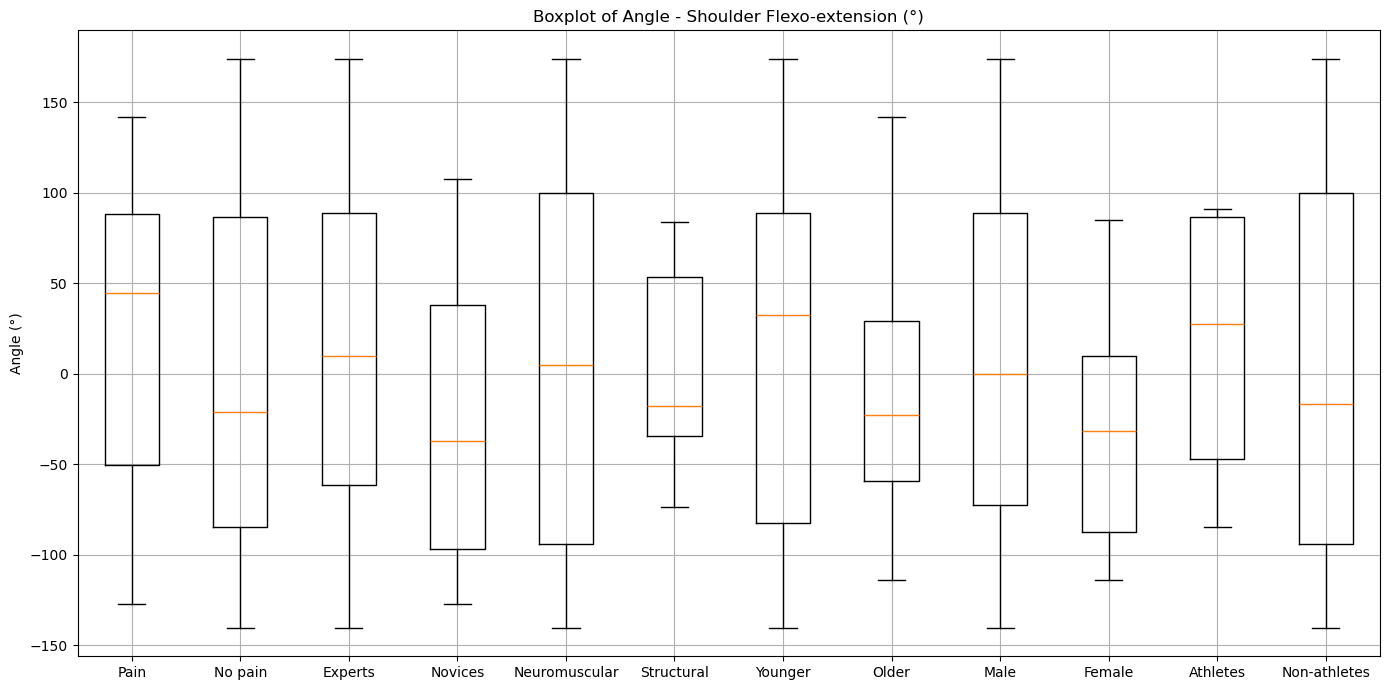

📊 Quartile Summary for Shoulder Flexo-extension (°):

        Group  Q1 (25%)  Median (50%)  Q3 (75%)    IQR
         Pain    -50.30         44.79     88.26 138.56
      No pain    -84.67        -21.02     86.43 171.11
      Experts    -61.40          9.94     88.87 150.27
      Novices    -96.52        -37.29     38.12 134.64
Neuromuscular    -94.22          5.13    100.01 194.23
   Structural    -34.25        -17.62     53.45  87.69
      Younger    -82.33         32.41     89.01 171.34
        Older    -59.23        -22.73     29.19  88.43
         Male    -72.64          0.11     89.07 161.71
       Female    -87.48        -31.60     10.00  97.47
     Athletes    -47.20         27.62     86.56 133.76
 Non-athletes    -94.22        -16.46    100.01 194.23

--------------------------------------------------------------------------------



C:\Users\fabia\AppData\Local\Temp\ipykernel_63460\4020805749.py:92: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=labels)


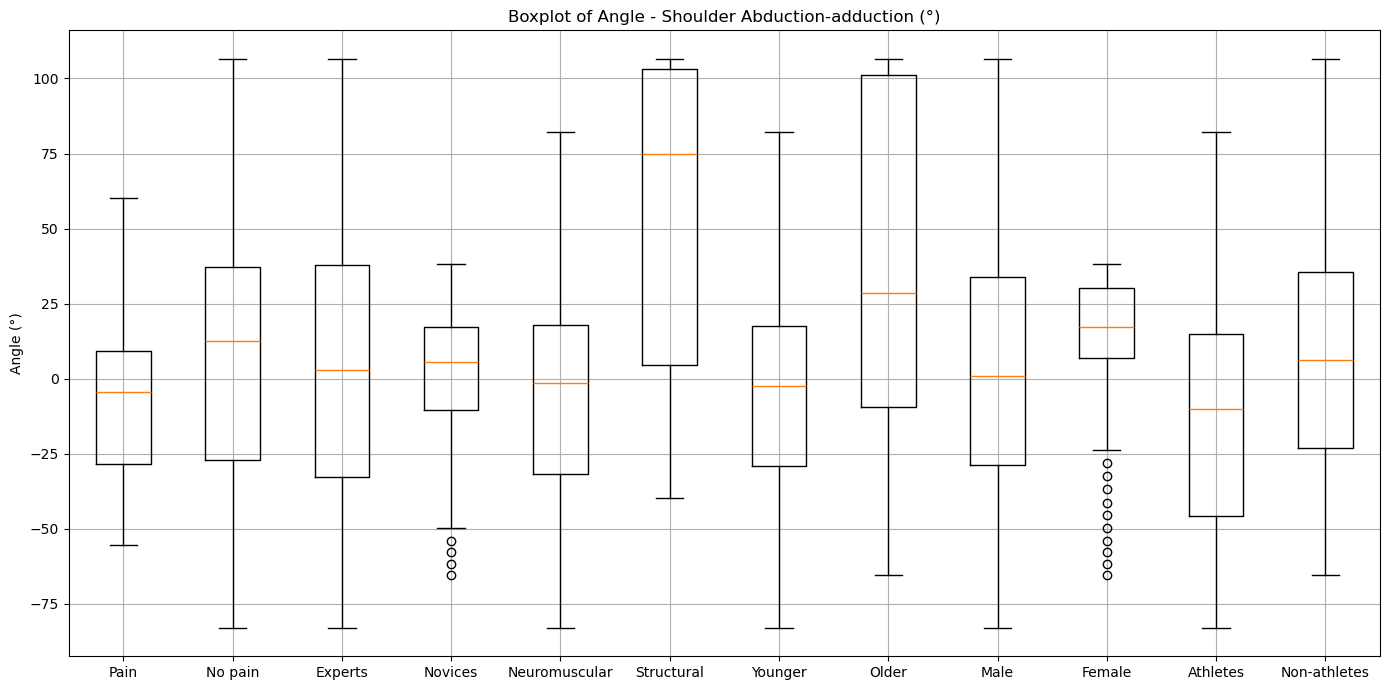

📊 Quartile Summary for Shoulder Abduction-adduction (°):

        Group  Q1 (25%)  Median (50%)  Q3 (75%)    IQR
         Pain    -28.34         -4.53      9.27  37.61
      No pain    -26.96         12.59     37.18  64.14
      Experts    -32.68          2.95     37.95  70.63
      Novices    -10.40          5.54     17.21  27.61
Neuromuscular    -31.91         -1.46     17.95  49.87
   Structural      4.48         74.89    103.26  98.78
      Younger    -29.19         -2.46     17.67  46.86
        Older     -9.50         28.61    101.28 110.79
         Male    -28.90          0.87     33.97  62.88
       Female      6.97         17.28     30.34  23.37
     Athletes    -45.70         -9.99     14.74  60.44
 Non-athletes    -23.15          6.27     35.36  58.51

--------------------------------------------------------------------------------



C:\Users\fabia\AppData\Local\Temp\ipykernel_63460\4020805749.py:92: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=labels)


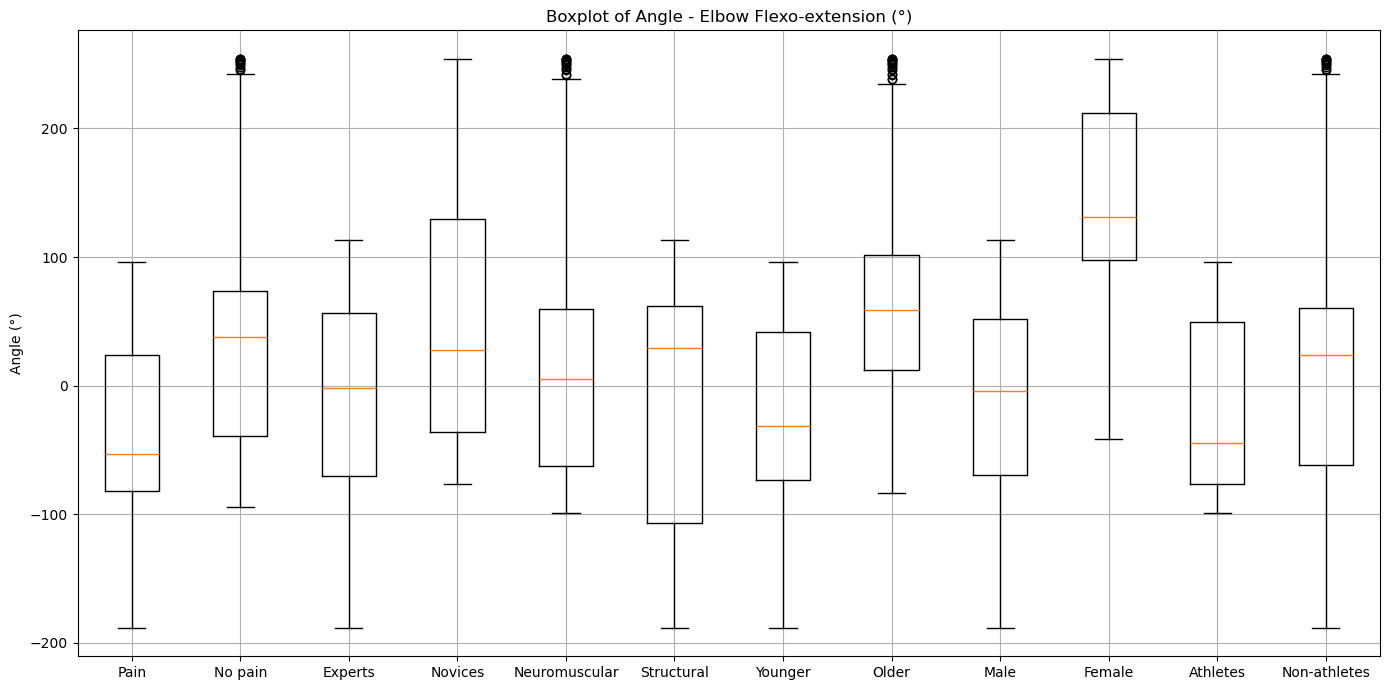

📊 Quartile Summary for Elbow Flexo-extension (°):

        Group  Q1 (25%)  Median (50%)  Q3 (75%)    IQR
         Pain    -81.83        -53.09     23.69 105.52
      No pain    -39.47         37.80     73.80 113.27
      Experts    -70.07         -2.11     56.51 126.58
      Novices    -36.03         27.90    129.77 165.81
Neuromuscular    -62.09          5.35     59.43 121.52
   Structural   -106.79         29.16     62.00 168.79
      Younger    -73.61        -31.03     41.95 115.56
        Older     11.88         58.84    101.36  89.47
         Male    -69.22         -4.55     51.90 121.12
       Female     97.72        130.83    212.26 114.54
     Athletes    -76.47        -44.89     49.25 125.72
 Non-athletes    -61.87         23.76     60.04 121.91

--------------------------------------------------------------------------------



C:\Users\fabia\AppData\Local\Temp\ipykernel_63460\4020805749.py:92: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=labels)


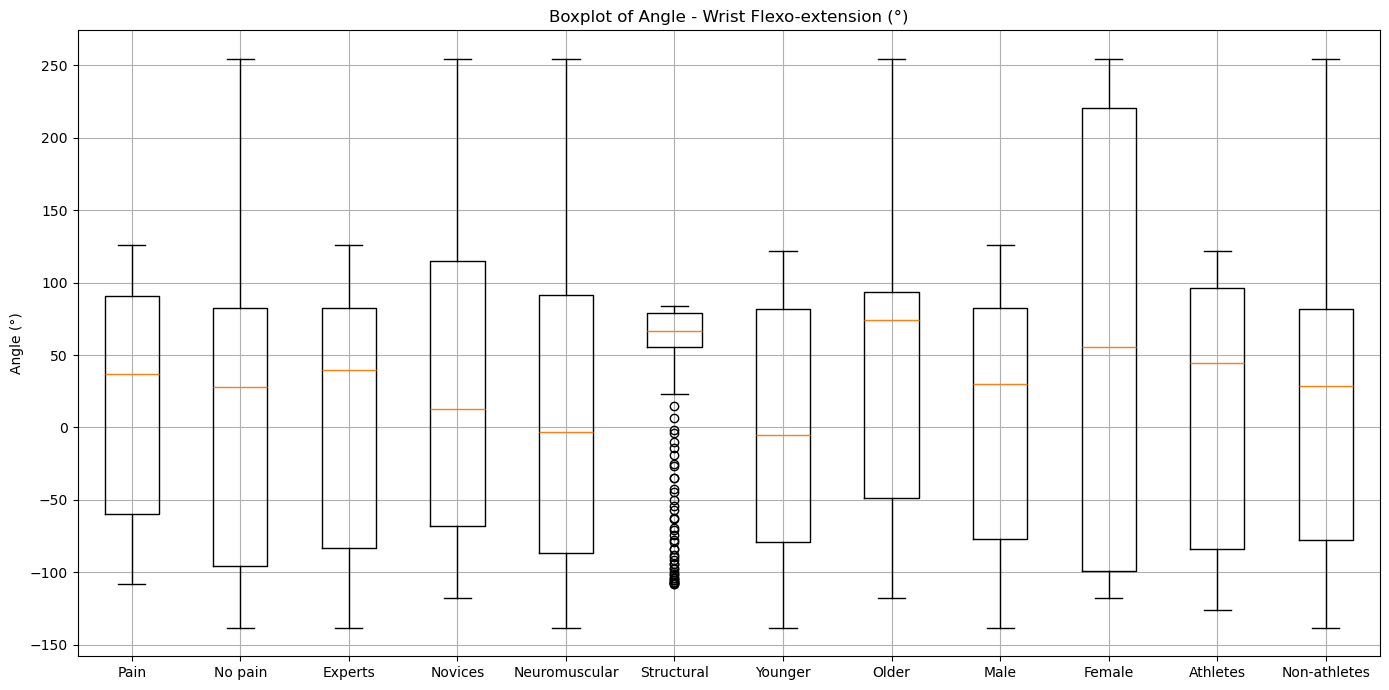

📊 Quartile Summary for Wrist Flexo-extension (°):

        Group  Q1 (25%)  Median (50%)  Q3 (75%)    IQR
         Pain    -59.61         36.91     90.48 150.09
      No pain    -95.32         28.14     82.74 178.06
      Experts    -83.41         39.54     82.43 165.84
      Novices    -68.23         12.53    114.97 183.20
Neuromuscular    -86.59         -2.88     91.15 177.74
   Structural     55.75         66.66     78.87  23.12
      Younger    -78.94         -5.44     81.53 160.47
        Older    -48.66         74.27     93.25 141.91
         Male    -77.23         30.20     82.51 159.74
       Female    -99.08         55.78    220.28 319.36
     Athletes    -83.85         44.16     96.19 180.04
 Non-athletes    -77.77         28.39     81.66 159.43

--------------------------------------------------------------------------------



C:\Users\fabia\AppData\Local\Temp\ipykernel_63460\4020805749.py:92: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=labels)


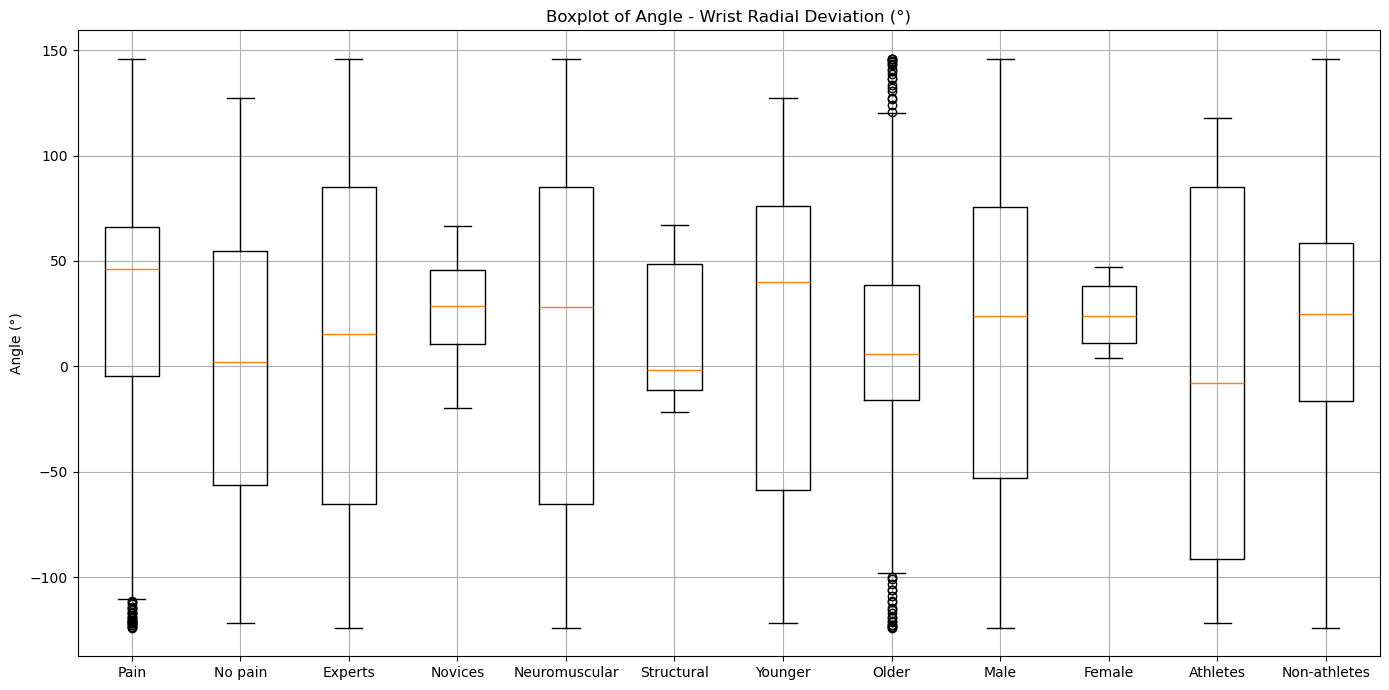

📊 Quartile Summary for Wrist Radial Deviation (°):

        Group  Q1 (25%)  Median (50%)  Q3 (75%)    IQR
         Pain     -4.53         46.32     66.08  70.60
      No pain    -56.45          2.21     54.80 111.26
      Experts    -65.42         15.37     85.13 150.55
      Novices     10.54         28.46     45.55  35.01
Neuromuscular    -65.42         28.08     85.13 150.55
   Structural    -11.16         -1.95     48.39  59.56
      Younger    -58.78         39.89     76.22 135.00
        Older    -16.21          6.01     38.57  54.78
         Male    -52.99         23.76     75.56 128.55
       Female     11.05         23.88     37.90  26.85
     Athletes    -91.62         -7.91     84.96 176.58
 Non-athletes    -16.63         25.01     58.73  75.36

--------------------------------------------------------------------------------

📘 Summary Table (Mean ± Std):

        Group Shoulder Flexo-extension (°) Shoulder Abduction-adduction (°) Elbow Flexo-extension (°) Wrist Flexo-exten

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Base directory and file paths
base_dir = "C:/Users/fabia/Desktop/DPB4/Datos Reales/"
files = [
    "1. Primer voluntario (Alfonso)/Toma 5/resultados_percentiles.xlsx",
    "2. Segundo voluntario (Wilfredo)/Toma 3/resultados_percentiles.xlsx",
    "3. Tercer voluntario (Luis)/resultados_percentiles.xlsx",
    "4. Cuarto voluntario (Antonio)/resultados_percentiles.xlsx",
    "5. Quinto voluntario (Juan)/resultados_percentiles.xlsx",
    "6. Sexto Voluntario (Edson)/resultados_percentiles.xlsx",
    "7. Septimo Voluntario (Jack)/resultados_percentiles.xlsx",
    "8. Octavo Voluntario (Luis S)/resultados_percentiles.xlsx",
    "9. Novena Voluntaria (Lily)/resultados_percentiles.xlsx",
    "10. Décimo Voluntario (Aldo)/resultados_percentiles.xlsx",
]
files = [os.path.join(base_dir, path) for path in files]
participant_names = [f"Participant {i+1}" for i in range(10)]

# Sheets: only propulsion
sheets = {
    "FlexoExt_hombro_Propulsion": "Shoulder Flexo-extension (°)",
    "AbdAdd_hombro_Propulsion": "Shoulder Abduction-adduction (°)",
    "FlexoExt_codo_Propulsion": "Elbow Flexo-extension (°)",
    "FlexoExt_Mnk_derecha_Propulsion": "Wrist Flexo-extension (°)",
    "DesvRadC_Mnk_derecha_Propulsion": "Wrist Radial Deviation (°)"
}

# Group definitions
groups = {
    'Pain':            [1,3,4,7],
    'No pain':         [0,2,5,6,8,9],
    'Experts':         [0,2,3,4,5,6,7,9],
    'Novices':         [1,8],
    'Neuromuscular':   [0,1,2,4,5,6,7,8],
    'Structural':      [3,9],
    'Younger':         [0,1,2,3,5,6,7],
    'Older':           [4,8,9],
    'Male':            [0,1,2,3,4,5,6,7,9],
    'Female':          [8],
    'Athletes':        [2,7],
    'Non-athletes':    [0,1,3,4,5,6,8,9]
}

# Load data
data = []
for idx, file in enumerate(files):
    try:
        xls = pd.ExcelFile(file)
        for sheet, label in sheets.items():
            if sheet in xls.sheet_names:
                df = pd.read_excel(xls, sheet_name=sheet)
                df['Participant'] = participant_names[idx]
                df['Index'] = idx
                df['Angle-Phase'] = label
                data.append(df)
    except Exception as e:
        print(f"Error reading {file}: {e}")

df_total = pd.concat(data, ignore_index=True)

# Boxplots and quartile summaries
for angle_label in df_total['Angle-Phase'].unique():
    data_to_plot = []
    labels = []
    q_summary = []

    for group, indices in groups.items():
        subset = df_total[(df_total['Index'].isin(indices)) & (df_total['Angle-Phase'] == angle_label)]
        if not subset.empty:
            values = subset['Angulo'].values
            data_to_plot.append(values)
            labels.append(group)

            # Calculate quartiles
            q1 = np.percentile(values, 25)
            median = np.percentile(values, 50)
            q3 = np.percentile(values, 75)
            q_summary.append({
                'Group': group,
                'Q1 (25%)': round(q1, 2),
                'Median (50%)': round(median, 2),
                'Q3 (75%)': round(q3, 2),
                'IQR': round(q3 - q1, 2)
            })

    if data_to_plot:
        plt.figure(figsize=(14,7))
        plt.boxplot(data_to_plot, labels=labels)
        plt.title(f"Boxplot of Angle - {angle_label}")
        plt.ylabel("Angle (°)")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # Print the quartile summary table
        print(f"📊 Quartile Summary for {angle_label}:\n")
        quartile_df = pd.DataFrame(q_summary)
        print(quartile_df.to_string(index=False))
        print("\n" + "-"*80 + "\n")

# Summary table with mean ± std
summary_rows = []
for group, indices in groups.items():
    row = {'Group': group}
    for angle_label in df_total['Angle-Phase'].unique():
        subset = df_total[(df_total['Index'].isin(indices)) & (df_total['Angle-Phase'] == angle_label)]
        if not subset.empty:
            mean = subset['Angulo'].mean()
            std = subset['Angulo'].std()
            row[angle_label] = f"{mean:.1f} ± {std:.1f}"
        else:
            row[angle_label] = "N/A"
    summary_rows.append(row)

summary_df = pd.DataFrame(summary_rows)

# Print mean ± std summary
print("📘 Summary Table (Mean ± Std):\n")
print(summary_df.to_string(index=False))
